In [599]:
import pandas as pd

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

##### import data

In [600]:
#repo=pd.read_csv('CommitData/C_0voice_campus_recruitmen_questions.csv', sep=",")

repo=pd.read_csv('Data/ml_data/graph_data.csv', sep=",",index_col=0)
#repo=pd.read_csv('data/CommitData/C_google_WebFundamentals.csv', sep=",")
#repo=pd.read_csv('data/CommitData/C_facebook_react.csv', sep=",")


In [608]:
repo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   owner                  313 non-null    object        
 1   repo                   313 non-null    object        
 2   stars                  313 non-null    int64         
 3   dateCreated            313 non-null    datetime64[ns]
 4   datePushed             313 non-null    datetime64[ns]
 5   numCommits             313 non-null    int64         
 6   openIssues             313 non-null    int64         
 7   closedIssues           313 non-null    int64         
 8   totalIssues            313 non-null    int64         
 9   totalAdditions         313 non-null    float64       
 10  totalDeletions         313 non-null    float64       
 11  fileCount              313 non-null    int64         
 12  Total nloc             313 non-null    int64         
 13  Avg.N

### Data Cleaning


In [603]:
repo.isnull().sum()

repo                      0
stars                     0
dateCreated               0
datePushed                0
numCommits                0
openIssues                0
closedIssues              0
totalIssues               0
totalAdditions            0
totalDeletions            0
fileCount                 0
Total nloc                0
Avg.NLOC                  0
AvgCCN                    0
Avg.token                 0
Fun Cnt                   0
file threshold cnt        0
Fun Rt                    0
nloc Rt                   0
Halstead Volume          21
Maintainability Index    55
dtype: int64

In [604]:
#repo = repo.fillna(0)
repo = repo.dropna()

In [605]:
# Convert Unix timestamp to datetime for recency calculation
repo['dateCreated'] = pd.to_datetime(repo['dateCreated'], unit='s')
repo['datePushed'] = pd.to_datetime(repo['datePushed'], unit='s')
repo = repo.reset_index()

C:\Users\ethan\AppData\Local\Temp\ipykernel_18084\771429102.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repo['dateCreated'] = pd.to_datetime(repo['dateCreated'], unit='s')
C:\Users\ethan\AppData\Local\Temp\ipykernel_18084\771429102.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repo['datePushed'] = pd.to_datetime(repo['datePushed'], unit='s')


In [606]:
repo.head()

,owner,repo,stars,dateCreated,datePushed,numCommits,openIssues,closedIssues,totalIssues,totalAdditions,...,Total nloc,Avg.NLOC,AvgCCN,Avg.token,Fun Cnt,file threshold cnt,Fun Rt,nloc Rt,Halstead Volume,Maintainability Index
0,facebook,react,216019,2013-05-24 16:15:54,2023-12-08 00:51:20,16117,1557,25219,26776,2734078.0,...,390639,8.2,1.4,37.6,31396,202,0.01,0.06,1831.576017,57.031450
1,pallets,flask,65156,2010-04-06 11:11:59,2023-12-07 03:48:51,5205,3,5081,5084,229166.0,...,13230,8.2,1.5,42.7,1403,3,0.00,0.02,2303.064603,56.321431
2,google,guetzli,12840,2016-10-21 15:13:18,2023-04-22 19:41:10,145,121,153,274,30443.0,...,7820,20.2,4.3,169.5,328,16,0.05,0.25,2521.773565,47.127959
3,d3,d3,106797,2010-09-27 17:22:42,2023-12-01 14:29:45,4480,14,3334,3348,673005.0,...,809,5.6,1.9,40.4,59,0,0.00,0.00,1158.238502,61.970744
4,vuejs,vue,205936,2013-07-29 03:24:51,2023-12-08 01:42:25,3581,606,11887,12493,1049649.0,...,62680,7.9,1.6,44.2,6427,39,0.01,0.05,1369.738383,58.241212


In [607]:
repo

,owner,repo,stars,dateCreated,datePushed,numCommits,openIssues,closedIssues,totalIssues,totalAdditions,...,Total nloc,Avg.NLOC,AvgCCN,Avg.token,Fun Cnt,file threshold cnt,Fun Rt,nloc Rt,Halstead Volume,Maintainability Index
0,facebook,react,216019,2013-05-24 16:15:54,2023-12-08 00:51:20,16117,1557,25219,26776,2734078.0,...,390639,8.2,1.4,37.6,31396,202,0.01,0.06,1831.576017,57.031450
1,pallets,flask,65156,2010-04-06 11:11:59,2023-12-07 03:48:51,5205,3,5081,5084,229166.0,...,13230,8.2,1.5,42.7,1403,3,0.00,0.02,2303.064603,56.321431
2,google,guetzli,12840,2016-10-21 15:13:18,2023-04-22 19:41:10,145,121,153,274,30443.0,...,7820,20.2,4.3,169.5,328,16,0.05,0.25,2521.773565,47.127959
3,d3,d3,106797,2010-09-27 17:22:42,2023-12-01 14:29:45,4480,14,3334,3348,673005.0,...,809,5.6,1.9,40.4,59,0,0.00,0.00,1158.238502,61.970744
4,vuejs,vue,205936,2013-07-29 03:24:51,2023-12-08 01:42:25,3581,606,11887,12493,1049649.0,...,62680,7.9,1.6,44.2,6427,39,0.01,0.05,1369.738383,58.241212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,kriskowal,q,14958,2010-09-04 01:21:12,2023-11-08 10:50:34,902,116,746,862,49177.0,...,6614,5.4,1.4,31.0,1377,4,0.00,0.04,2716.053714,59.790803
309,mozilla,BrowserQuest,9180,2011-09-30 18:47:48,2023-07-14 00:56:50,153,10,39,49,3392617.0,...,26637,9.7,2.9,59.0,2562,55,0.02,0.26,2371.616291,54.452433
310,kamens,jQuery-menu-aim,7707,2013-03-03 02:50:35,2018-11-01 09:37:40,32,67,32,99,10529.0,...,1555,3.2,3.3,58.0,686,12,0.02,0.01,8550.538879,61.004947
311,h5bp,Front-end-Developer-Interview-Questions,58266,2012-02-09 23:34:10,2023-12-07 01:41:25,973,40,814,854,68168.0,...,103,6.3,1.2,30.2,14,0,0.00,0.00,1415.000909,60.340171


In [596]:
from datetime import datetime

# Calculate the ratio of openIssues to closedIssues + 1 (to avoid division by zero)
repo['open_close_ratio'] = repo['openIssues'] / (repo['closedIssues'] + 1)


# Convert datePushed to datetime and calculate repo age in days and days since last push
repo['datePushed'] = pd.to_datetime(repo['datePushed'])
repo['dateCreated'] = pd.to_datetime(repo['dateCreated'])


most_recent_push_date = repo['datePushed'].max()

# Calculating days since last push
repo['daysSinceLastPush'] = (most_recent_push_date - repo['datePushed']).dt.days

# Calculate commit frequency (commits per day)
repo['repoAgeDays'] = (repo['datePushed'] - repo['dateCreated']).dt.days
repo['commitFrequency'] = repo['numCommits'] / repo['repoAgeDays']

# Calculate the ratio of closed to total issues as an indicator of issue management efficiency
repo['closedIssueRatio'] = repo['closedIssues'] / (repo['totalIssues']+ 1)

# Calculate the ratio of open issues to total issues as an indicator of current pending tasks
repo['openIssueRatio'] = repo['openIssues'] / (repo['totalIssues']+ 1)

# Selecting relevant columns for analysis
analysis_columns = ['owner', 'repo', 'numCommits', 'repoAgeDays', 'commitFrequency', 'daysSinceLastPush']
repo_analysis = repo[analysis_columns]

# Display the calculated metrics
repo_analysis.head()


,owner,repo,numCommits,repoAgeDays,commitFrequency,daysSinceLastPush
0,facebook,react,16117,3849,4.187321,0
1,pallets,flask,5205,4992,1.042668,1
2,google,guetzli,145,2374,0.061078,229
3,d3,d3,4480,4812,0.931006,6
4,vuejs,vue,3581,3783,0.946603,0


In [587]:
# Then, find the most recent push date
most_recent_push_date = repo['datePushed'].max()
repo['datePushed'].max()

Timestamp('2023-12-08 04:49:22')

In [588]:
repo.isnull().sum()

owner                    0
repo                     0
stars                    0
dateCreated              0
datePushed               0
numCommits               0
openIssues               0
closedIssues             0
totalIssues              0
totalAdditions           0
totalDeletions           0
fileCount                0
Total nloc               0
Avg.NLOC                 0
AvgCCN                   0
Avg.token                0
Fun Cnt                  0
file threshold cnt       0
Fun Rt                   0
nloc Rt                  0
Halstead Volume          0
Maintainability Index    0
open_close_ratio         0
daysSinceLastPush        0
repoAgeDays              0
commitFrequency          0
closedIssueRatio         0
openIssueRatio           0
dtype: int64

In [507]:
repo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 956 entries, 0 to 955
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   owner                  956 non-null    object        
 1   repo                   956 non-null    object        
 2   stars                  956 non-null    int64         
 3   dateCreated            956 non-null    datetime64[ns]
 4   datePushed             956 non-null    datetime64[ns]
 5   numCommits             956 non-null    int64         
 6   openIssues             956 non-null    int64         
 7   closedIssues           956 non-null    int64         
 8   totalIssues            956 non-null    int64         
 9   totalAdditions         956 non-null    float64       
 10  totalDeletions         956 non-null    float64       
 11  fileCount              956 non-null    int64         
 12  include                956 non-null    bool          
 13  Repository

In [508]:
import numpy as np 

# List all numerical features of the original dataframe
numerical_features = repo.select_dtypes(include=[np.number]).columns.tolist()
numerical_features


['stars',
 'numCommits',
 'openIssues',
 'closedIssues',
 'totalIssues',
 'totalAdditions',
 'totalDeletions',
 'fileCount',
 'Total nloc',
 'Avg.NLOC',
 'AvgCCN',
 'Avg.token',
 'Fun Cnt',
 'file threshold cnt',
 'Fun Rt',
 'nloc Rt',
 'Halstead Volume',
 'Maintainability Index',
 'open_close_ratio',
 'daysSinceLastPush',
 'repoAgeDays',
 'commitFrequency',
 'closedIssueRatio',
 'openIssueRatio']

In [509]:

import pandas as pd
import numpy as np

corr = repo[numerical_features].corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

,stars,numCommits,openIssues,closedIssues,totalIssues,totalAdditions,totalDeletions,fileCount,Total nloc,Avg.NLOC,AvgCCN,Avg.token,Fun Cnt,file threshold cnt,Fun Rt,nloc Rt,Halstead Volume,Maintainability Index,open_close_ratio,daysSinceLastPush,repoAgeDays,commitFrequency,closedIssueRatio,openIssueRatio
stars,1.000000,0.156489,0.107605,0.252436,0.251074,-0.017753,-0.016834,0.018951,-0.000030,-0.092954,-0.138474,-0.106330,-0.014931,-0.023419,-0.071190,-0.093699,-0.061098,-0.222973,-0.068227,-0.182024,0.004978,0.090457,0.078447,-0.056935
numCommits,0.156489,1.000000,0.225667,0.694020,0.680301,0.306702,0.278286,0.379581,0.320744,0.108710,0.105935,0.127210,0.314445,0.226077,0.087947,0.109488,0.026372,0.070215,-0.187754,-0.181061,0.164794,0.777141,0.207296,-0.212331
openIssues,0.107605,0.225667,1.000000,0.404539,0.519987,0.122532,0.134824,0.253427,0.152033,0.065722,0.099214,0.083667,0.140294,0.108352,0.104458,0.146650,0.002148,0.064894,0.387350,-0.063385,-0.016973,0.168837,-0.407211,0.472944
closedIssues,0.252436,0.694020,0.404539,1.000000,0.991515,0.219493,0.210483,0.318726,0.296141,0.077661,0.020676,0.059348,0.266128,0.150438,0.012802,0.057326,0.016197,0.084446,-0.173729,-0.155486,0.107660,0.515717,0.207008,-0.192738
totalIssues,0.251074,0.680301,0.519987,0.991515,1.000000,0.222426,0.215758,0.333717,0.298210,0.081878,0.033415,0.067325,0.268509,0.155913,0.026806,0.074389,0.015434,0.088098,-0.107206,-0.154235,0.098143,0.505685,0.135466,-0.112795
totalAdditions,-0.017753,0.306702,0.122532,0.219493,0.222426,1.000000,0.937368,0.364307,0.380133,0.051706,0.110579,0.094421,0.457625,0.378353,0.069086,0.096526,0.088298,0.058918,-0.057057,-0.043346,0.025243,0.252459,0.061128,-0.057566
totalDeletions,-0.016834,0.278286,0.134824,0.210483,0.215758,0.937368,1.000000,0.266993,0.252810,0.053963,0.118636,0.101092,0.336335,0.293904,0.065274,0.090322,0.062468,0.054061,-0.060153,-0.036343,0.021122,0.225781,0.065386,-0.062095
fileCount,0.018951,0.379581,0.253427,0.318726,0.333717,0.364307,0.266993,1.000000,0.316630,0.060885,0.070885,0.066576,0.379446,0.259153,0.049504,0.089400,-0.041427,0.067635,0.006236,-0.064684,-0.071692,0.335241,-0.031762,0.052097
Total nloc,-0.000030,0.320744,0.152033,0.296141,0.298210,0.380133,0.252810,0.316630,1.000000,0.092075,0.076694,0.104113,0.662110,0.500754,0.066819,0.144686,0.154297,0.080113,-0.021137,-0.045554,-0.003676,0.266839,0.019549,-0.008844
Avg.NLOC,-0.092954,0.108710,0.065722,0.077661,0.081878,0.051706,0.053963,0.060885,0.092075,1.000000,0.717625,0.937831,0.021985,0.087938,0.396783,0.427952,0.086191,0.224065,0.063156,-0.079852,0.003699,0.106228,-0.064807,0.089825


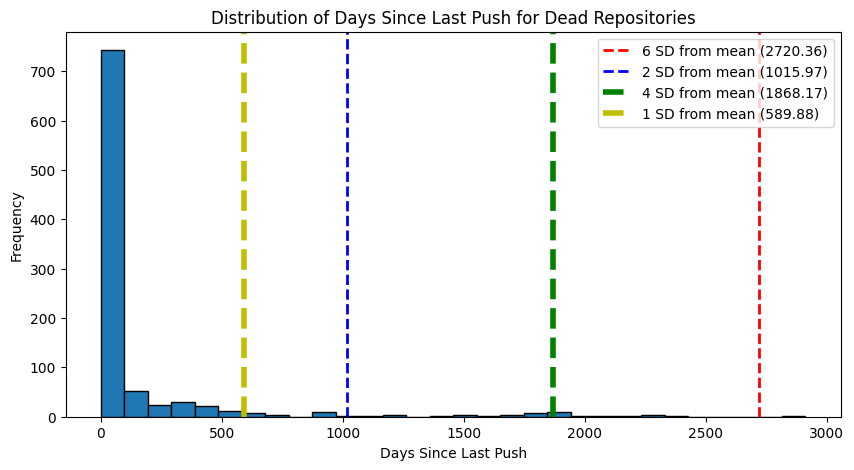

In [510]:
import matplotlib.pyplot as plt
import numpy as np

# We'll use the filtered_repo which contains 'daysSinceLastPush' between 0 and 300
# First calculate the mean and standard deviation
mean_value = repo['daysSinceLastPush'].mean()
std_dev = repo['daysSinceLastPush'].std()

# Calculate the position of the line at 6 standard deviations from the mean
line_position = mean_value + 6*std_dev

# Plot the histogram
plt.figure(figsize=(10, 5))
plt.hist(repo['daysSinceLastPush'], bins=30,  edgecolor='black')
plt.title('Distribution of Days Since Last Push for Dead Repositories')
plt.xlabel('Days Since Last Push')
plt.ylabel('Frequency')

# Calculate the position of the line at 6 standard deviations from the mean
line_position = mean_value + 6*std_dev
plt.axvline(line_position, color='r', linestyle='dashed', linewidth=2, label=f'6 SD from mean ({line_position:.2f})')

# Calculate the position of the line at 2 standard deviations from the mean
line_position = mean_value + 2*std_dev
plt.axvline(line_position, color='b', linestyle='dashed', linewidth=2, label=f'2 SD from mean ({line_position:.2f})')

# Calculate the position of the line at 4 standard deviations from the mean
line_position = mean_value + 4*std_dev
plt.axvline(line_position, color='g', linestyle='dashed', linewidth=4, label=f'4 SD from mean ({line_position:.2f})')

# Calculate the position of the line at 1 standard deviations from the mean
line_position = mean_value + 1*std_dev
plt.axvline(line_position, color='y', linestyle='dashed', linewidth=4, label=f'1 SD from mean ({line_position:.2f})')

# Add a legend to the plot
plt.legend()

#plt.xlim(0, 300)  # This ensures that the x-axis only shows the range from 0 to 300
plt.show()



In [511]:
repo

,owner,repo,stars,dateCreated,datePushed,numCommits,openIssues,closedIssues,totalIssues,totalAdditions,...,Fun Rt,nloc Rt,Halstead Volume,Maintainability Index,open_close_ratio,daysSinceLastPush,repoAgeDays,commitFrequency,closedIssueRatio,openIssueRatio
0,facebook,react,216019,2013-05-24 16:15:54,2023-12-08 00:51:20,16117,1557,25219,26776,2734078.0,...,0.01,0.06,1831.576017,57.031450,0.061737,0,3849,4.187321,0.941816,0.058147
1,pallets,flask,65156,2010-04-06 11:11:59,2023-12-07 03:48:51,5205,3,5081,5084,229166.0,...,0.00,0.02,2303.064603,56.321431,0.000590,1,4992,1.042668,0.999213,0.000590
2,google,guetzli,12840,2016-10-21 15:13:18,2023-04-22 19:41:10,145,121,153,274,30443.0,...,0.05,0.25,2521.773565,47.127959,0.785714,229,2374,0.061078,0.556364,0.440000
3,EbookFoundation,free-programming-books,304317,2013-10-11 06:50:37,2023-12-05 18:16:56,9110,43,10783,10826,87660.0,...,0.00,0.00,1157.136905,0.000000,0.003987,2,3707,2.457513,0.995936,0.003972
4,d3,d3,106797,2010-09-27 17:22:42,2023-12-01 14:29:45,4480,14,3334,3348,673005.0,...,0.00,0.00,1158.238502,61.970744,0.004198,6,4812,0.931006,0.995521,0.004180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,natesales,q,1348,2021-03-01 06:45:22,2023-11-11 22:58:23,421,13,68,81,12128.0,...,0.00,0.04,2716.053714,59.790803,0.188406,26,985,0.427411,0.829268,0.158537
952,zestyping,q,1265,2013-03-18 20:22:52,2023-11-23 23:57:42,119,18,48,66,2774.0,...,0.00,0.04,2716.053714,59.790803,0.367347,14,3902,0.030497,0.716418,0.268657
953,joschan21,quill,1238,2023-09-25 14:48:55,2023-10-31 14:49:55,16,37,18,55,15156.0,...,0.00,0.01,1776.736712,55.298691,1.947368,37,36,0.444444,0.321429,0.660714
954,cycfi,q,1022,2017-11-04 02:06:19,2023-10-22 06:09:15,1191,2,66,68,386949.0,...,0.00,0.04,2716.053714,59.790803,0.029851,46,2178,0.546832,0.956522,0.028986


In [512]:
repo[numerical_features].describe()


,stars,numCommits,openIssues,closedIssues,totalIssues,totalAdditions,totalDeletions,fileCount,Total nloc,Avg.NLOC,...,Fun Rt,nloc Rt,Halstead Volume,Maintainability Index,open_close_ratio,daysSinceLastPush,repoAgeDays,commitFrequency,closedIssueRatio,openIssueRatio
count,956.000000,956.000000,956.000000,956.000000,956.000000,9.560000e+02,9.560000e+02,956.000000,9.560000e+02,956.000000,...,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000
mean,29805.413180,3714.040795,306.952929,3458.986402,3765.939331,1.172261e+06,8.380684e+05,820.950837,5.502005e+04,8.015167,...,0.009414,0.065858,2358.796710,49.171442,0.131778,163.783473,3704.860879,1.063232,0.900777,0.094601
std,35470.047796,2907.087701,553.801241,3639.012424,3896.104850,2.764789e+06,1.939390e+06,1564.425185,1.526187e+05,6.081393,...,0.015277,0.090502,3371.094768,20.561478,0.235925,426.095656,937.036013,0.965329,0.124826,0.112537
min,23.000000,16.000000,0.000000,0.000000,0.000000,3.660000e+02,1.690000e+02,1.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,0.015342,0.000000,0.000000
25%,13232.750000,1655.250000,37.750000,1274.250000,1394.500000,1.253390e+05,6.583200e+04,122.750000,5.097500e+03,5.400000,...,0.000000,0.000000,874.207538,51.493710,0.015819,1.000000,3131.250000,0.473259,0.875080,0.015573
50%,20493.000000,2630.000000,120.500000,2295.000000,2587.000000,3.586800e+05,2.242140e+05,324.000000,1.647850e+04,7.500000,...,0.000000,0.030000,1538.734183,56.278995,0.062071,8.000000,3662.500000,0.753170,0.940069,0.058443
75%,32262.000000,5003.750000,390.000000,4229.500000,4620.500000,1.052487e+06,6.869100e+05,831.000000,5.013100e+04,9.900000,...,0.010000,0.100000,2625.480073,59.932121,0.140941,70.250000,4436.750000,1.327224,0.982857,0.123531
max,304317.000000,16117.000000,7888.000000,26186.000000,28216.000000,3.149048e+07,2.055987e+07,14462.000000,2.595852e+06,88.000000,...,0.140000,0.590000,32555.771081,74.693650,2.030303,2912.000000,5745.000000,8.752418,0.999785,0.670000


In [513]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from joblib import dump, load


# Select the numeric features
numeric_features = repo.select_dtypes(include=[np.number]).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on your data and transform it
repo[numeric_features] = scaler.fit_transform(repo[numeric_features])

# Save the scaler to disk for later use
dump(scaler, 'scaler.joblib')

['scaler.joblib']

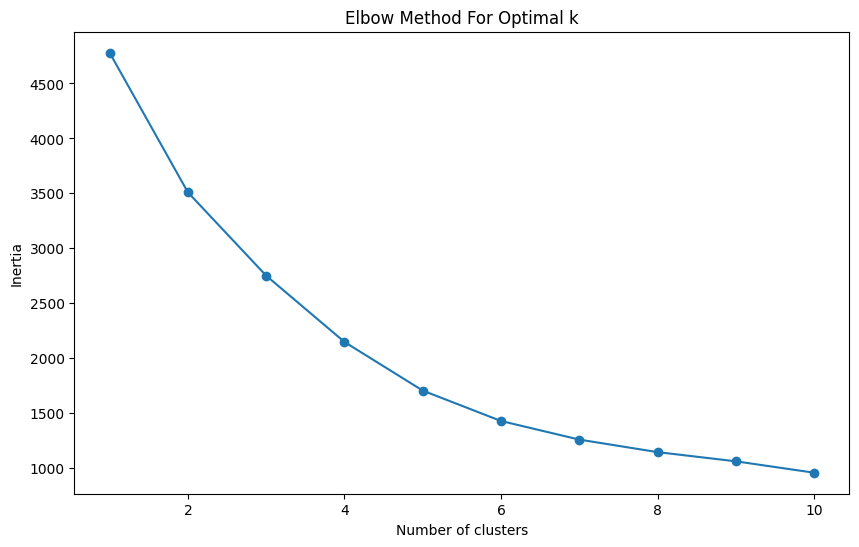

In [514]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# Selecting features for clustering
features = repo[['commitFrequency', 'daysSinceLastPush','numCommits','closedIssueRatio','stars']]
# Normalizing the features
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)

# Finding an appropriate number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_normalized)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [515]:
# Assuming an optimal number of clusters based on the Elbow Method (for demonstration, we choose 3)
optimal_clusters = 2

# Applying K-means clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(features_normalized)

# Adding the cluster labels to our dataset
repo['Cluster'] = clusters
# Analyzing the centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroid_df = pd.DataFrame(centroids, columns=['commitFrequency', 'daysSinceLastPush','numCommits','closedIssueRatio','stars'])

centroid_df['Cluster'] = centroid_df.index

centroid_df


,commitFrequency,daysSinceLastPush,numCommits,closedIssueRatio,stars,Cluster
0,-0.438353,0.076797,-0.494168,-0.084719,-0.137473,0
1,1.244641,-0.218055,1.403119,0.240548,0.390334,1


Cluster 0 as "dead" or inactive,

Cluster 1 as "dormant" or minimally active,

Cluster 2 as "alive" or highly active.

In [516]:
from sklearn.cluster import KMeans

# Normalize your features (assuming they are stored in a DataFrame called 'features')
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)

# Apply K-means clustering (let's say we determined that 3 clusters is optimal)
kmeans = KMeans(n_clusters=2, random_state=42)
repo['Cluster'] = kmeans.fit_predict(features_normalized)


In [517]:
# Replace the numerical cluster labels with descriptive labels
#cluster_mappings = {2: 'alive', 0: 'dead', 1: 'dormant'}
cluster_mappings = {1: 'alive', 0: 'dead'}
repo['Cluster'] = repo['Cluster'].replace(cluster_mappings)

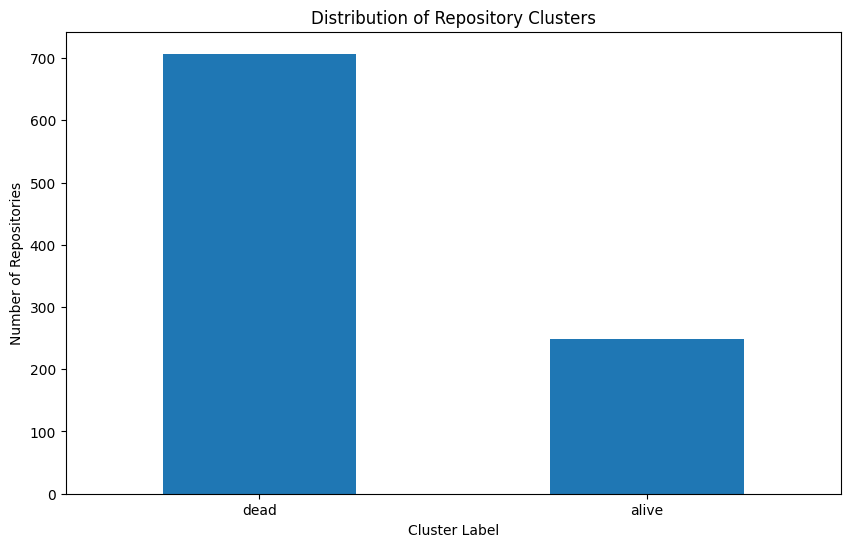

In [518]:
# Creating a bar plot for the cluster distribution
cluster_counts = repo['Cluster'].value_counts()

plt.figure(figsize=(10, 6))
cluster_counts.plot(kind='bar')
plt.title('Distribution of Repository Clusters')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Repositories')
plt.xticks(rotation=0)  # To keep the cluster labels horizontal
plt.show()


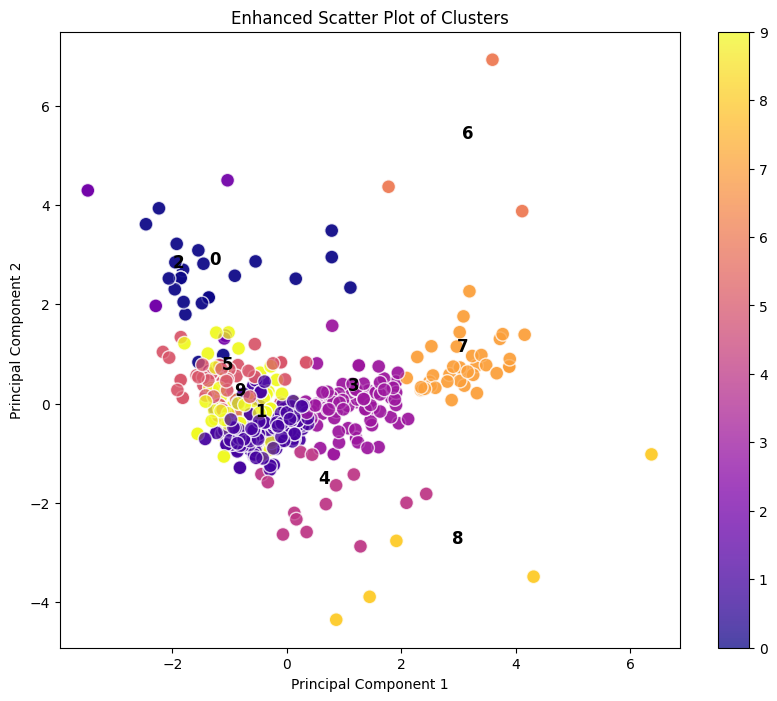

In [547]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'features_normalized' is your normalized data with more than two features
pca = PCA(n_components=3)
principal_components = pca.fit_transform(features_normalized)

# Apply K-means clustering (assuming 'k' is the optimal number of clusters you've determined)
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(features_normalized)

# Calculate the cluster centers for annotations
cluster_centers = pca.transform(kmeans.cluster_centers_)

# Plotting the scatter plot with enhanced visuals
plt.figure(figsize=(10, 8))
scatter = plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='plasma', marker='o', edgecolor='w', s=100, alpha=0.75)

# Annotate the cluster centers
for idx, center in enumerate(cluster_centers):
    plt.annotate(idx, (center[0], center[1]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=12, color='black', weight='bold')

plt.title('Enhanced Scatter Plot of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter)  # To show the cluster colors
plt.show()


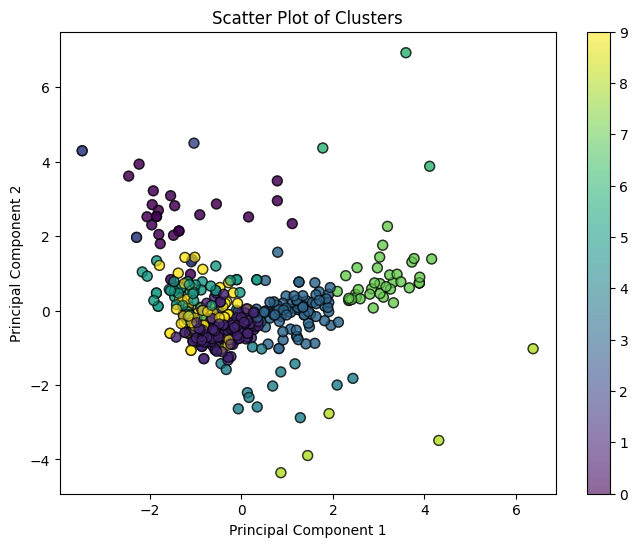

In [520]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'features_normalized' is your normalized data with more than two features
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_normalized)

# Apply K-means clustering (assuming 'k' is the optimal number of clusters you've determined)
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(features_normalized)

# Plotting the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.6)
plt.title('Scatter Plot of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()  # To show the cluster colors
plt.show()


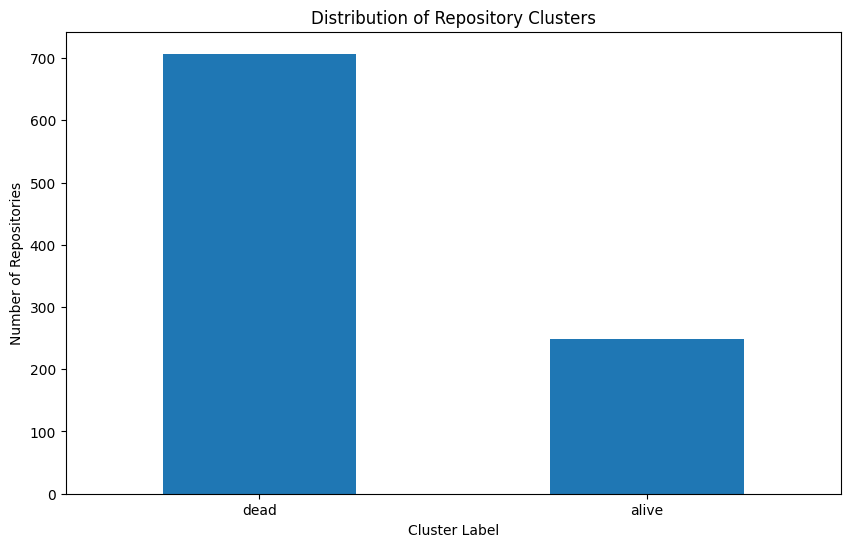

In [521]:
# Creating a bar plot for the cluster distribution
cluster_counts = repo['Cluster'].value_counts()

plt.figure(figsize=(10, 6))
cluster_counts.plot(kind='bar')
plt.title('Distribution of Repository Clusters')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Repositories')
plt.xticks(rotation=0)  # To keep the cluster labels horizontal
plt.show()


In [522]:
# First, add the cluster labels back to your original DataFrame
repo['Cluster'] = clusters

# Aggregate the cluster statistics
cluster_stats = repo.groupby('Cluster').agg({
    'daysSinceLastPush': 'median',  # Using median to minimize the effect of outliers
    'commitFrequency': 'median'
})

# Determine the cluster labels based on the aggregated statistics
# This is a simplification and should be adjusted based on actual cluster stats
cluster_stats['Status'] = np.where(
    (cluster_stats['daysSinceLastPush'] > cluster_stats['daysSinceLastPush'].median()) & 
    (cluster_stats['commitFrequency'] < cluster_stats['commitFrequency'].median()),
    'dead',
    'alive'
)

# Apply the status labels back to the original DataFrame
repo = repo.merge(cluster_stats['Status'], left_on='Cluster', right_index=True)

# Now, original_data will have a 'Status' column with 'dead' or 'alive' labels for each repository


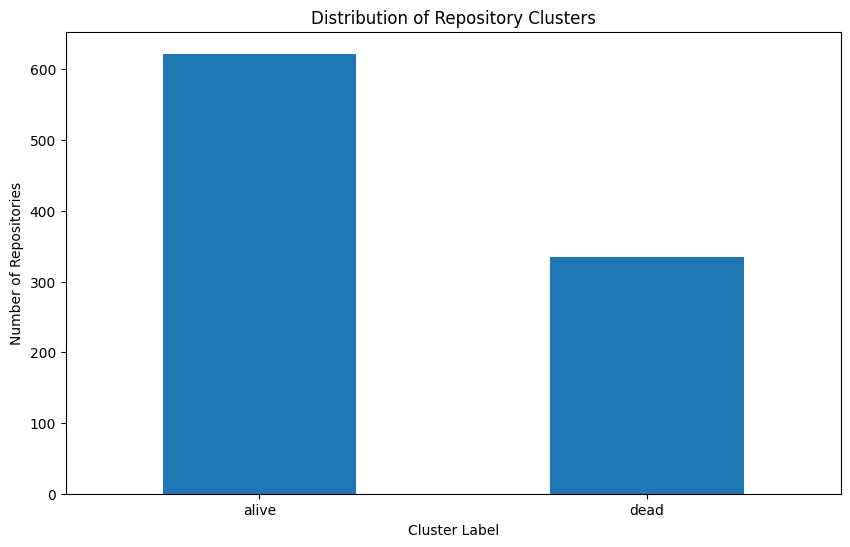

In [523]:
# Creating a bar plot for the cluster distribution
cluster_counts = repo['Status'].value_counts()

plt.figure(figsize=(10, 6))
cluster_counts.plot(kind='bar')
plt.title('Distribution of Repository Clusters')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Repositories')
plt.xticks(rotation=0)  # To keep the cluster labels horizontal
plt.show()


In [524]:
#undo scaling 

scaler = load('scaler.joblib')

# Use the loaded scaler to invert the transformation
repo[numeric_features] = scaler.inverse_transform(repo[numeric_features])

In [525]:
sorted_repo = repo.sort_values(by='daysSinceLastPush', ascending=False)

# Display the first few entries to verify
sorted_repo[['owner', 'repo', 'daysSinceLastPush', 'Status']].head()

,owner,repo,daysSinceLastPush,Status
877,JakeWharton,ActionBarSherlock,2912.0,dead
392,JakeWharton,ActionBarSherlock,2912.0,dead
866,facebookarchive,three20,2410.0,dead
381,facebookarchive,three20,2410.0,dead
752,nathanmarz,storm,2305.0,dead


In [526]:
# Calculate mean and standard deviation for 'daysSinceLastPush'
mean_days = repo['daysSinceLastPush'].mean()
std_days = repo['daysSinceLastPush'].std()

# Calculate the threshold for being classified as "dead"
dead_threshold = mean_days + 1 * std_days

repo.loc[repo['daysSinceLastPush'] > dead_threshold, 'Status'] = 'dead'  # Repos below the threshold are "dead"

# Display the DataFrame to verify the classification
print(repo[['owner', 'repo', 'daysSinceLastPush', 'Status']].head())


              owner                         repo  daysSinceLastPush Status
0          facebook                        react                0.0  alive
3   EbookFoundation       free-programming-books                2.0  alive
6      sindresorhus                      awesome                1.0  alive
13          jwasham  coding-interview-university                3.0  alive
42    kamranahmedse            developer-roadmap                0.0  alive


In [527]:
# Calculate mean and standard deviation for 'daysSinceLastPush'
mean_days = repo['daysSinceLastPush'].mean()
std_days = repo['daysSinceLastPush'].std()

# Calculate the threshold for being classified as "dead"
alive_threshold = mean_days - 1 * std_days

repo.loc[repo['daysSinceLastPush'] <= alive_threshold, 'Status'] = 'alive'  # Repos below the threshold are "dead"

# Display the DataFrame to verify the classification
print(repo[['owner', 'repo', 'daysSinceLastPush', 'Status']].head())


              owner                         repo  daysSinceLastPush Status
0          facebook                        react                0.0  alive
3   EbookFoundation       free-programming-books                2.0  alive
6      sindresorhus                      awesome                1.0  alive
13          jwasham  coding-interview-university                3.0  alive
42    kamranahmedse            developer-roadmap                0.0  alive


#### alive repos

In [530]:
repo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 956 entries, 0 to 953
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   owner                  956 non-null    object        
 1   repo                   956 non-null    object        
 2   stars                  956 non-null    float64       
 3   dateCreated            956 non-null    datetime64[ns]
 4   datePushed             956 non-null    datetime64[ns]
 5   numCommits             956 non-null    float64       
 6   openIssues             956 non-null    float64       
 7   closedIssues           956 non-null    float64       
 8   totalIssues            956 non-null    float64       
 9   totalAdditions         956 non-null    float64       
 10  totalDeletions         956 non-null    float64       
 11  fileCount              956 non-null    float64       
 12  include                956 non-null    bool          
 13  Repository

In [531]:
# Step 1: Filter the DataFrame to include only "dead" repositories
alive_repos = repo[repo['Status'] == 'alive']

descriptive_stats = alive_repos.describe()

descriptive_stats


,stars,dateCreated,datePushed,numCommits,openIssues,closedIssues,totalIssues,totalAdditions,totalDeletions,fileCount,...,nloc Rt,Halstead Volume,Maintainability Index,open_close_ratio,daysSinceLastPush,repoAgeDays,commitFrequency,closedIssueRatio,openIssueRatio,Cluster
count,618.000000,618,618,618.000000,618.000000,618.000000,618.000000,6.180000e+02,6.180000e+02,618.000000,...,618.000000,618.000000,6.180000e+02,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000
mean,35098.592233,2013-04-07 11:50:27.828478976,2023-10-23 08:04:39.668284928,4635.001618,238.729773,4379.228155,4617.957929,1.455776e+06,1.019584e+06,984.380259,...,0.062168,2471.964889,4.962422e+01,0.053476,45.373786,3850.322006,1.279620,0.953469,0.044477,2.533981
min,681.000000,2008-03-10 07:34:08,2022-04-27 07:57:04,259.000000,0.000000,0.000000,2.000000,3.503000e+03,1.897000e+03,1.000000,...,0.000000,0.000000,-7.105427e-15,0.000000,0.000000,499.000000,0.091037,0.000000,0.000000,1.000000
25%,14323.250000,2011-06-04 21:43:56.750000128,2023-11-09 07:36:44,2131.000000,21.250000,1752.000000,1823.000000,1.700410e+05,9.567300e+04,141.000000,...,0.000000,890.287458,5.103929e+01,0.009594,0.000000,3201.000000,0.560239,0.939308,0.009503,1.000000
50%,23852.000000,2013-07-20 18:53:45,2023-12-04 04:38:05,3666.500000,64.000000,3136.000000,3265.500000,4.705710e+05,3.046010e+05,379.000000,...,0.030000,1582.504638,5.616053e+01,0.025712,4.000000,3733.000000,0.928826,0.972209,0.025068,1.000000
75%,37377.000000,2015-01-13 19:45:03,2023-12-07 11:38:04,6397.000000,246.000000,5435.000000,5723.000000,1.393203e+06,9.350870e+05,1035.000000,...,0.080000,2678.784997,6.034017e+01,0.063851,28.000000,4526.000000,1.739245,0.989569,0.060018,3.000000
max,304317.000000,2022-03-22 09:34:51,2023-12-08 04:49:22,16117.000000,2701.000000,26186.000000,28216.000000,3.149048e+07,2.055987e+07,14462.000000,...,0.490000,32555.771081,7.469365e+01,2.000000,589.000000,5745.000000,8.752418,0.999785,0.666667,8.000000
std,41993.736191,NaN,NaN,3132.628296,409.939356,4026.377956,4305.260516,3.267479e+06,2.238622e+06,1814.714528,...,0.087496,3628.146586,2.022056e+01,0.125077,109.224871,828.400972,1.050538,0.071775,0.058831,2.096453


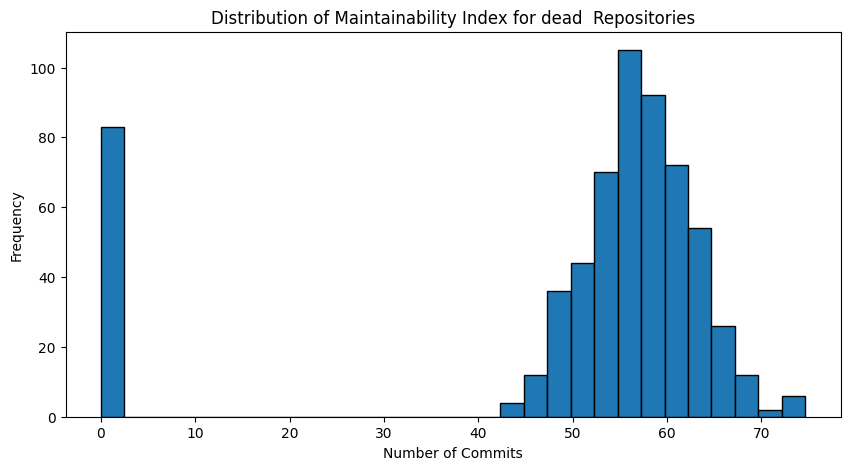

In [543]:
# Plot the distribution for a specific feature, e.g., 'numCommits'
plt.figure(figsize=(10, 5))
plt.hist(alive_repos['Maintainability Index'], bins=30, edgecolor='black')
plt.title('Distribution of Maintainability Index for dead  Repositories')
plt.xlabel('Number of Commits')
plt.ylabel('Frequency')
plt.show()

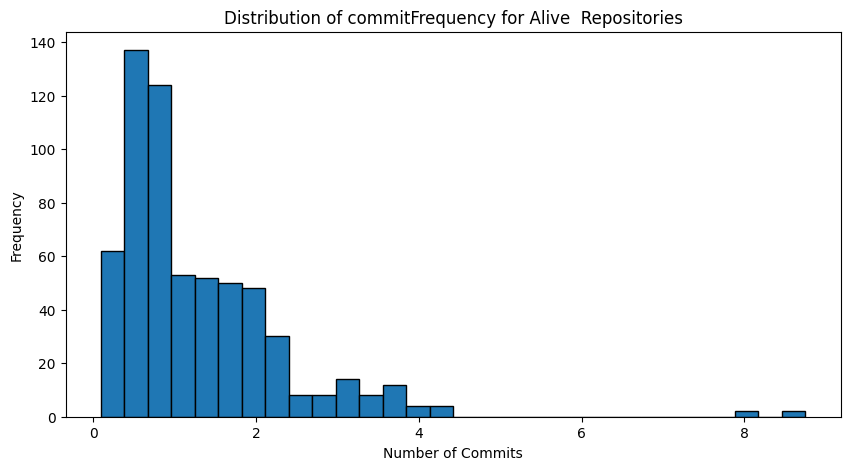

In [532]:
# Plot the distribution for a specific feature, e.g., 'numCommits'
plt.figure(figsize=(10, 5))
plt.hist(alive_repos['commitFrequency'], bins=30, edgecolor='black')
plt.title('Distribution of commitFrequency for Alive  Repositories')
plt.xlabel('Number of Commits')
plt.ylabel('Frequency')
plt.show()

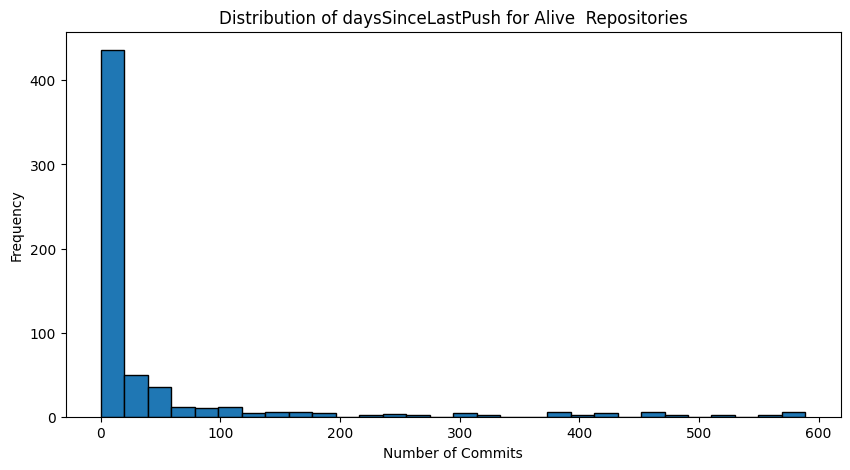

In [533]:

# Plot the distribution for a specific feature, e.g., 'numCommits'
plt.figure(figsize=(10, 5))
plt.hist(alive_repos['daysSinceLastPush'], bins=30, edgecolor='black')
plt.title('Distribution of daysSinceLastPush for Alive  Repositories')
plt.xlabel('Number of Commits')
plt.ylabel('Frequency')
plt.show()

#### dead repos 

In [534]:
# Step 1: Filter the DataFrame to include only "dead" repositories
dead_repos = repo[repo['Status'] == 'dead']

descriptive_stats = dead_repos.describe()

descriptive_stats


,stars,dateCreated,datePushed,numCommits,openIssues,closedIssues,totalIssues,totalAdditions,totalDeletions,fileCount,...,nloc Rt,Halstead Volume,Maintainability Index,open_close_ratio,daysSinceLastPush,repoAgeDays,commitFrequency,closedIssueRatio,openIssueRatio,Cluster
count,338.000000,338,338,338.000000,338.000000,338.000000,338.000000,3.380000e+02,3.380000e+02,338.000000,...,338.000000,338.000000,3.380000e+02,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000
mean,20127.352071,2013-06-23 00:25:08.286982400,2022-11-22 10:00:38.591716096,2030.153846,431.692308,1776.414201,2208.106509,6.538803e+05,5.061842e+05,522.136095,...,0.072604,2151.879745,4.834359e+01,0.274945,380.284024,3438.899408,0.667586,0.804436,0.186248,6.136095
min,23.000000,2008-06-18 23:30:53,2015-12-17 17:54:50,16.000000,0.000000,0.000000,0.000000,3.660000e+02,1.690000e+02,2.000000,...,0.000000,0.000000,-7.105427e-15,0.000000,0.000000,36.000000,0.015342,0.000000,0.000000,0.000000
25%,11172.000000,2011-09-21 15:16:20,2022-11-29 01:10:53.500000,1284.000000,116.000000,768.000000,903.000000,6.137525e+04,3.126200e+04,109.500000,...,0.010000,797.948115,5.221703e+01,0.116028,3.250000,2797.000000,0.362901,0.745121,0.103965,5.000000
50%,16500.000000,2013-06-25 17:31:52,2023-10-27 16:01:32,1760.000000,246.000000,1441.000000,1757.000000,2.068670e+05,1.158610e+05,267.500000,...,0.040000,1500.684177,5.662808e+01,0.165192,41.000000,3458.000000,0.543339,0.854737,0.141772,6.000000
75%,24539.250000,2015-01-15 09:35:51,2023-12-04 12:50:16.750000128,2515.000000,464.000000,2219.000000,2746.000000,5.300180e+05,3.084440e+05,587.000000,...,0.117500,2437.260339,5.950303e+01,0.322504,373.750000,4286.000000,0.792927,0.895154,0.243857,9.000000
max,80436.000000,2023-09-25 14:48:55,2023-12-08 04:35:05,8342.000000,7888.000000,18637.000000,20803.000000,8.464295e+06,6.062040e+06,6506.000000,...,0.590000,29128.903669,7.179675e+01,2.030303,2912.000000,5357.000000,6.167401,0.999547,0.670000,9.000000
std,13831.502229,NaN,NaN,1258.153972,733.010973,1858.198004,2305.578235,1.303068e+06,1.145670e+06,876.173407,...,0.095518,2835.057158,2.117595e+01,0.311912,648.025480,1059.260285,0.614223,0.142557,0.128534,3.273733


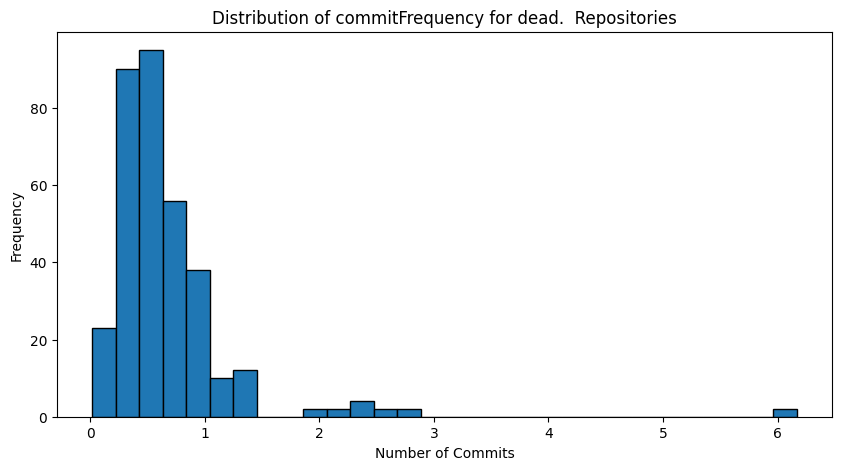

In [539]:
# Plot the distribution for a specific feature, e.g., 'numCommits'
plt.figure(figsize=(10, 5))
plt.hist(dead_repos['commitFrequency'], bins=30, edgecolor='black')
plt.title('Distribution of commitFrequency for dead.  Repositories')
plt.xlabel('Number of Commits')
plt.ylabel('Frequency')
plt.show()



# Plot the distribution for a specific feature, e.g., 'numCommits'
plt.figure(figsize=(10, 5))
plt.hist(alive_repos['daysSinceLastPush'], bins=30, edgecolor='black')
plt.title('Distribution of daysSinceLastPush for Alive  Repositories')
plt.xlabel('Number of Commits')
plt.ylabel('Frequency')
plt.show()

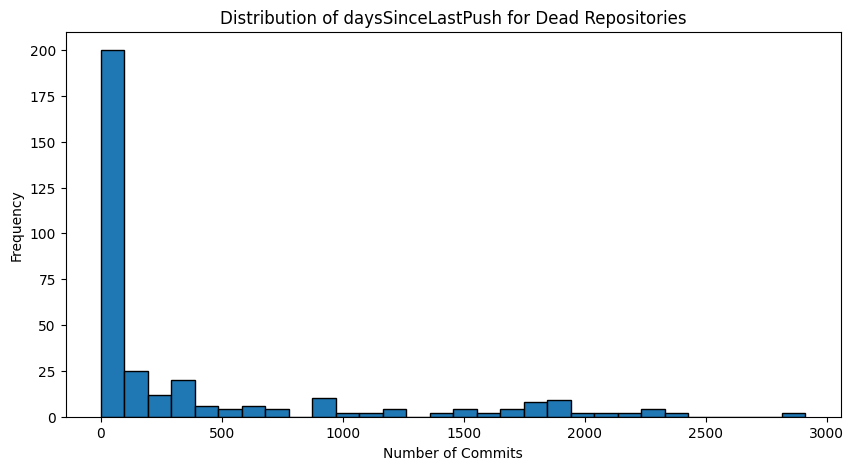

In [536]:

# Plot the distribution for a specific feature, e.g., 'numCommits'
plt.figure(figsize=(10, 5))
plt.hist(dead_repos['daysSinceLastPush'], bins=30, edgecolor='black')
plt.title('Distribution of daysSinceLastPush for Dead Repositories')
plt.xlabel('Number of Commits')
plt.ylabel('Frequency')
plt.show()

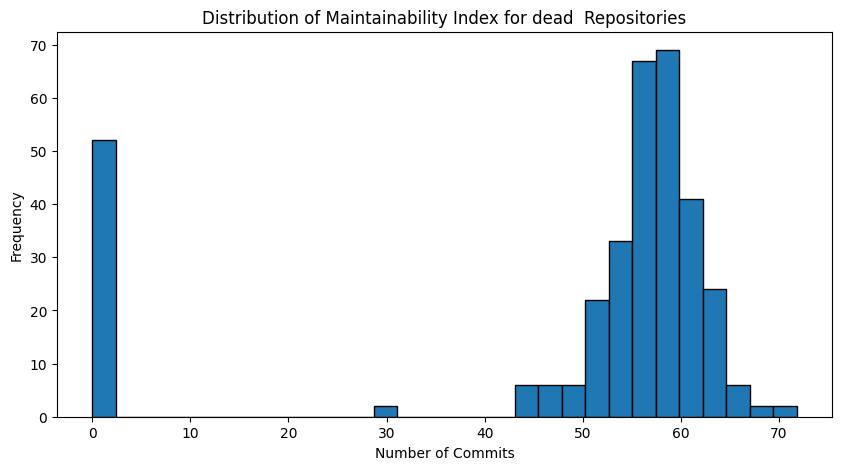

In [542]:
# Plot the distribution for a specific feature, e.g., 'numCommits'
plt.figure(figsize=(10, 5))
plt.hist(dead_repos['Maintainability Index'], bins=30, edgecolor='black')
plt.title('Distribution of Maintainability Index for dead  Repositories')
plt.xlabel('Number of Commits')
plt.ylabel('Frequency')
plt.show()

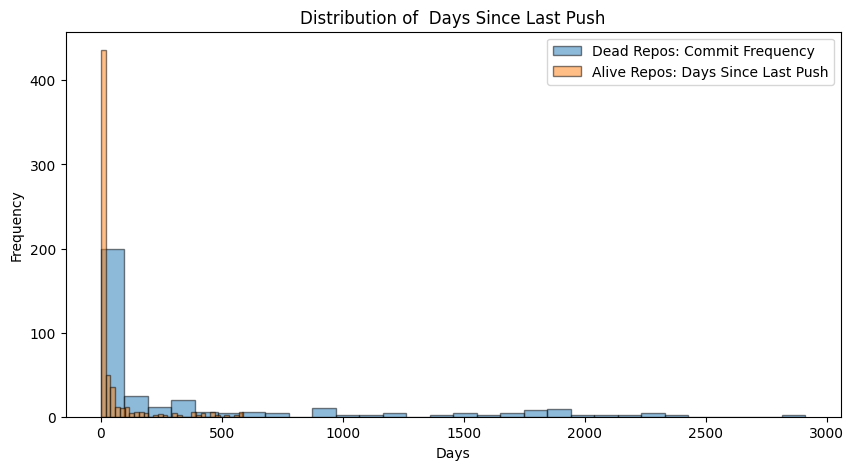

In [548]:
# Assuming 'dead_repos' and 'alive_repos' are DataFrames that contain the 'commitFrequency' and 'daysSinceLastPush' columns respectively
# We will plot the histograms for both features in one plot for comparison

plt.figure(figsize=(10, 5))

# Plotting 'commitFrequency' for dead repositories
plt.hist(dead_repos['daysSinceLastPush'], bins=30, alpha=0.5, label='Dead Repos: Commit Frequency', edgecolor='black')

# Plotting 'daysSinceLastPush' for alive repositories
plt.hist(alive_repos['daysSinceLastPush'], bins=30, alpha=0.5, label='Alive Repos: Days Since Last Push', edgecolor='black')

# Adding title, labels, and legend
plt.title('Distribution of  Days Since Last Push')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.legend()
plt.show()



In [418]:
repo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 956 entries, 0 to 953
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   owner                  956 non-null    object        
 1   repo                   956 non-null    object        
 2   stars                  956 non-null    float64       
 3   dateCreated            956 non-null    datetime64[ns]
 4   datePushed             956 non-null    datetime64[ns]
 5   numCommits             956 non-null    float64       
 6   openIssues             956 non-null    float64       
 7   closedIssues           956 non-null    float64       
 8   totalIssues            956 non-null    float64       
 9   totalAdditions         956 non-null    float64       
 10  totalDeletions         956 non-null    float64       
 11  fileCount              956 non-null    float64       
 12  include                956 non-null    bool          
 13  Repository

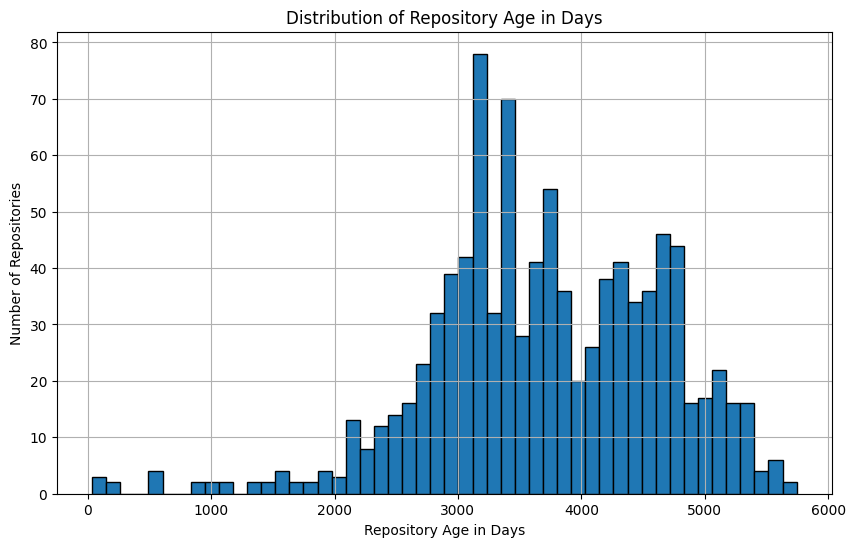

In [423]:
import matplotlib.pyplot as plt

# Assuming 'original_data' is your DataFrame and it contains 'repoAgeDays' column
# Let's create a histogram plot for the 'repoAgeDays' feature

plt.figure(figsize=(10, 6))
plt.hist(repo['repoAgeDays'], bins=50, edgecolor='black')
plt.title('Distribution of Repository Age in Days')
plt.xlabel('Repository Age in Days')
plt.ylabel('Number of Repositories')
plt.grid(True)
plt.show()


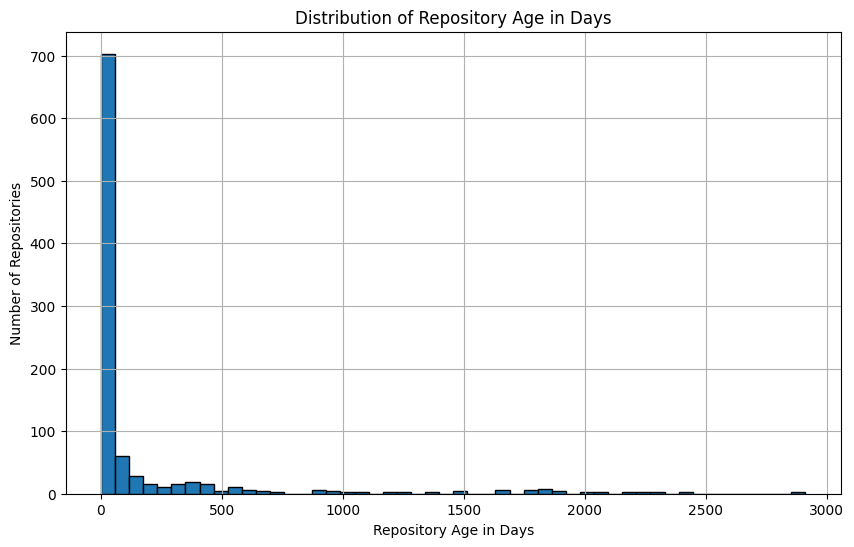

In [424]:
import matplotlib.pyplot as plt

# Assuming 'original_data' is your DataFrame and it contains 'repoAgeDays' column
# Let's create a histogram plot for the 'repoAgeDays' feature

plt.figure(figsize=(10, 6))
plt.hist(repo['daysSinceLastPush'], bins=50, edgecolor='black')
plt.title('Distribution of Repository Age in Days')
plt.xlabel('Repository Age in Days')
plt.ylabel('Number of Repositories')
plt.grid(True)
plt.show()


In [425]:
# Assuming 'original_data' is the DataFrame and it contains 'daysSinceLastPush' column
# Count the number of repositories with 'daysSinceLastPush' over 500 days
num_repos_over_500_days = repo[repo['daysSinceLastPush'] > 500].shape[0]

num_repos_over_500_days



85

In [1305]:
repo

,owner,repo,stars,dateCreated,datePushed,numCommits,openIssues,closedIssues,totalIssues,totalAdditions,...,nloc Rt,Halstead Volume,Maintainability Index,open_close_ratio,daysSinceLastPush,repoAgeDays,commitFrequency,closedIssueRatio,openIssueRatio,Cluster
0,facebook,react,216019.0,2013-05-24 16:15:54,2023-12-08 00:51:20,16117.0,1557.0,25219.0,26776.0,2734078.0,...,0.06,1831.576017,5.703145e+01,0.061737,0.0,3849.0,4.187321,0.941816,0.058147,alive
1,pallets,flask,65156.0,2010-04-06 11:11:59,2023-12-07 03:48:51,5205.0,3.0,5081.0,5084.0,229166.0,...,0.02,2303.064603,5.632143e+01,0.000590,1.0,4992.0,1.042668,0.999213,0.000590,alive
2,google,guetzli,12840.0,2016-10-21 15:13:18,2023-04-22 19:41:10,145.0,121.0,153.0,274.0,30443.0,...,0.25,2521.773565,4.712796e+01,0.785714,229.0,2374.0,0.061078,0.556364,0.440000,dead
3,EbookFoundation,free-programming-books,304317.0,2013-10-11 06:50:37,2023-12-05 18:16:56,9110.0,43.0,10783.0,10826.0,87660.0,...,0.00,1157.136905,-7.105427e-15,0.003987,2.0,3707.0,2.457513,0.995936,0.003972,alive
4,d3,d3,106797.0,2010-09-27 17:22:42,2023-12-01 14:29:45,4480.0,14.0,3334.0,3348.0,673005.0,...,0.00,1158.238502,6.197074e+01,0.004198,6.0,4812.0,0.931006,0.995521,0.004180,alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,natesales,q,1348.0,2021-03-01 06:45:22,2023-11-11 22:58:23,421.0,13.0,68.0,81.0,12128.0,...,0.04,2716.053714,5.979080e+01,0.188406,26.0,985.0,0.427411,0.829268,0.158537,dead
952,zestyping,q,1265.0,2013-03-18 20:22:52,2023-11-23 23:57:42,119.0,18.0,48.0,66.0,2774.0,...,0.04,2716.053714,5.979080e+01,0.367347,14.0,3902.0,0.030497,0.716418,0.268657,dead
953,joschan21,quill,1238.0,2023-09-25 14:48:55,2023-10-31 14:49:55,16.0,37.0,18.0,55.0,15156.0,...,0.01,1776.736712,5.529869e+01,1.947368,37.0,36.0,0.444444,0.321429,0.660714,dead
954,cycfi,q,1022.0,2017-11-04 02:06:19,2023-10-22 06:09:15,1191.0,2.0,66.0,68.0,386949.0,...,0.04,2716.053714,5.979080e+01,0.029851,46.0,2178.0,0.546832,0.956522,0.028986,dead


In [1306]:
repo['Cluster'] = repo['Cluster'].replace({'alive': 1, 'dead': 0})

In [1307]:
repo = repo.rename(columns={'Cluster': 'status'})

In [1308]:
repo.to_csv('Data/ml_data/graph_data_cluster.csv')

In [229]:
# test 2 


In [49]:
from datetime import datetime



# Calculate the ratio of closed to total issues as an indicator of issue management efficiency
repo['closedIssueRatio'] = repo['closedIssues'] / (repo['totalIssues']+ 1)

# Calculate the ratio of open issues to total issues as an indicator of current pending tasks
repo['openIssueRatio'] = repo['openIssues'] / (repo['totalIssues']+ 1)

# Normalizing metrics to ensure they contribute equally to the score
repo['normalizedCommits'] = (repo['numCommits'] - repo['numCommits'].min()) / (repo['numCommits'].max() - repo['numCommits'].min())
repo['normalizedClosedIssueRatio'] = repo['closedIssueRatio']
repo['recentActivity'] = 1 - (repo['daysSinceLastPush'] / repo['daysSinceLastPush'].max())

repo['compositeActivityScore'] = (repo['normalizedCommits'] + repo['normalizedClosedIssueRatio'] + repo['recentActivity']) / 3



In [53]:
repo.to_csv('Data/ml_data/repo_graph.csv')

In [50]:
import pandas as pd
import numpy as np
corr_matrix = repo[features].corr()
corr_matrix.style.background_gradient(cmap='coolwarm')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

ValueError: could not convert string to float: 'facebook'

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer

# Define the binary target variable based on 'daysSinceLastPush'
# Considering repositories with no push in the last 180 days (approx. 6 months) as inactive (0), active otherwise (1)
repo['isActive'] = (repo['daysSinceLastPush'] <= 180).astype(int)

# Prepare the dataset
# Selecting features for the model
model_features = ['daysSinceLastPush', 'numCommits', 'closedIssueRatio', 'Maintainability Index']
X = repo[model_features]

# Handling missing values in 'Maintainability Index' using median imputation
imputer = SimpleImputer(strategy='median')
X['Maintainability Index'] = imputer.fit_transform(X[['Maintainability Index']])

# Target variable
y = repo['isActive']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the logistic regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy, report


C:\Users\ethan\AppData\Local\Temp\ipykernel_24656\2960924274.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Maintainability Index'] = imputer.fit_transform(X[['Maintainability Index']])


(1.0,
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        34\n           1       1.00      1.00      1.00       158\n\n    accuracy                           1.00       192\n   macro avg       1.00      1.00      1.00       192\nweighted avg       1.00      1.00      1.00       192\n')

In [230]:
repo


,owner,repo,stars,dateCreated,datePushed,numCommits,openIssues,closedIssues,totalIssues,totalAdditions,...,nloc Rt,Halstead Volume,Maintainability Index,open_close_ratio,daysSinceLastPush,repoAgeDays,commitFrequency,closedIssueRatio,openIssueRatio,Cluster
0,facebook,react,216019,2013-05-24 16:15:54,2023-12-08 00:51:20,16117,1557,25219,26776,2734078.0,...,0.06,1831.576017,57.031450,0.061737,0,3849,4.187321,0.941816,0.058147,alive
1,pallets,flask,65156,2010-04-06 11:11:59,2023-12-07 03:48:51,5205,3,5081,5084,229166.0,...,0.02,2303.064603,56.321431,0.000590,1,4992,1.042668,0.999213,0.000590,dead
2,google,guetzli,12840,2016-10-21 15:13:18,2023-04-22 19:41:10,145,121,153,274,30443.0,...,0.25,2521.773565,47.127959,0.785714,229,2374,0.061078,0.556364,0.440000,dead
3,EbookFoundation,free-programming-books,304317,2013-10-11 06:50:37,2023-12-05 18:16:56,9110,43,10783,10826,87660.0,...,0.00,1157.136905,0.000000,0.003987,2,3707,2.457513,0.995936,0.003972,alive
4,d3,d3,106797,2010-09-27 17:22:42,2023-12-01 14:29:45,4480,14,3334,3348,673005.0,...,0.00,1158.238502,61.970744,0.004198,6,4812,0.931006,0.995521,0.004180,dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,natesales,q,1348,2021-03-01 06:45:22,2023-11-11 22:58:23,421,13,68,81,12128.0,...,0.04,2716.053714,59.790803,0.188406,26,985,0.427411,0.829268,0.158537,dead
952,zestyping,q,1265,2013-03-18 20:22:52,2023-11-23 23:57:42,119,18,48,66,2774.0,...,0.04,2716.053714,59.790803,0.367347,14,3902,0.030497,0.716418,0.268657,dead
953,joschan21,quill,1238,2023-09-25 14:48:55,2023-10-31 14:49:55,16,37,18,55,15156.0,...,0.01,1776.736712,55.298691,1.947368,37,36,0.444444,0.321429,0.660714,dead
954,cycfi,q,1022,2017-11-04 02:06:19,2023-10-22 06:09:15,1191,2,66,68,386949.0,...,0.04,2716.053714,59.790803,0.029851,46,2178,0.546832,0.956522,0.028986,dead


In [14]:
from datetime import datetime

# Convert timestamps to datetime objects for 'dateCreated' and 'datePushed'
repo['dateCreated'] = pd.to_datetime(repo['dateCreated'], unit='s')
repo['datePushed'] = pd.to_datetime(repo['datePushed'], unit='s')

# Calculate the age of the repository in years
current_date = datetime.now()
repo['repoAgeYears'] = (current_date - repo['dateCreated']).dt.days / 365.25

# Calculate commit frequency as numCommits divided by repoAgeYears
repo['commitFrequency'] = repo['numCommits'] / repo['repoAgeYears']

# Calculate the recency of the last commit in days
repo['daysSinceLastCommit'] = (current_date - repo['datePushed']).dt.days

# Simplify the dataframe for display purposes
simplified_data = repo[['owner', 'repo', 'repoAgeYears', 'commitFrequency', 'daysSinceLastCommit']]

simplified_data.head()


,owner,repo,repoAgeYears,commitFrequency,daysSinceLastCommit
0,facebook,react,10.710472,1504.788919,63
1,pallets,flask,13.845311,375.939539,64
2,google,guetzli,7.299110,19.865435,292
3,EbookFoundation,free-programming-books,10.329911,881.904983,65
4,d3,d3,13.366188,335.174109,69


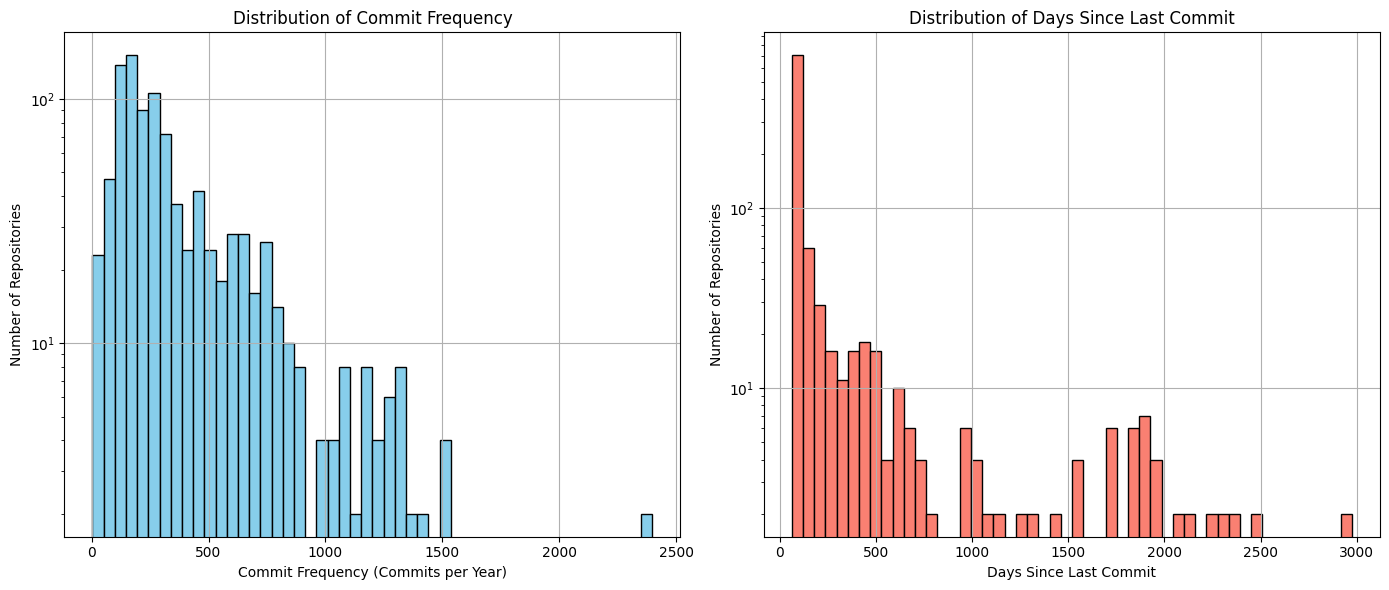

,commitFrequency,daysSinceLastCommit
count,956.000000,956.000000
mean,358.690558,227.131799
std,304.499737,426.124082
min,2.925657,63.000000
25%,155.723596,64.000000
50%,256.603434,71.500000
75%,467.951760,134.000000
max,2398.775399,2975.000000


In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the distribution of commit frequency
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(repo['commitFrequency'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Commit Frequency')
plt.xlabel('Commit Frequency (Commits per Year)')
plt.ylabel('Number of Repositories')
plt.yscale('log') # Log scale to better visualize the distribution
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(repo['daysSinceLastCommit'], bins=50, color='salmon', edgecolor='black')
plt.title('Distribution of Days Since Last Commit')
plt.xlabel('Days Since Last Commit')
plt.ylabel('Number of Repositories')
plt.yscale('log') # Log scale to better visualize the distribution
plt.grid(True)

plt.tight_layout()
plt.show()

# Calculate and display basic statistics for these metrics to aid in setting thresholds
basic_stats = repo[['commitFrequency', 'daysSinceLastCommit']].describe()
basic_stats


In [19]:
# Apply thresholds to classify repositories
repo['classification'] = 'Review' # Default classification
repo.loc[(repo['commitFrequency'] > 257) & (repo['daysSinceLastCommit'] <= 180), 'classification'] = 'Active'
repo.loc[(repo['commitFrequency'] <= 257) | (repo['daysSinceLastCommit'] > 180), 'classification'] = 'Potential Dead'

# Count the number of repositories in each classification
classification_counts = repo['classification'].value_counts()


# Active repository candidate
active_repo = repo[repo['classification'] == 'Active'].sort_values(by=['commitFrequency', 'daysSinceLastCommit'], ascending=[False, True]).head(1)

# Potential Dead repository candidate
potential_dead_repo = repo[repo['classification'] == 'Potential Dead'].sort_values(by=['daysSinceLastCommit', 'commitFrequency'], ascending=[False, False]).head(1)

# Combine the selections for display
case_study_candidates = pd.concat([active_repo, potential_dead_repo])

case_study_candidates[['owner', 'repo', 'stars', 'repoAgeYears', 'commitFrequency', 'daysSinceLastCommit', 'classification']]


,owner,repo,stars,repoAgeYears,commitFrequency,daysSinceLastCommit,classification
68,toddmotto,public-apis,1587,1.886379,2398.775399,171,Active
392,JakeWharton,ActionBarSherlock,7126,12.925394,114.503283,2975,Potential Dead


In [65]:
import pandas as pd
from datetime import datetime

# Assuming 'repo' DataFrame is already created with your new data

# Convert Unix timestamp to datetime for recency calculation
repo['dateCreated'] = pd.to_datetime(repo['dateCreated'], unit='s')
repo['datePushed'] = pd.to_datetime(repo['datePushed'], unit='s')

# Normalize the stars count
repo['normalized_stars'] = repo['stars'] / repo['stars'].max()

# Commit Activity Score (scaled number of commits)
repo['commit_activity'] = repo['numCommits'] / repo['numCommits'].max()

# Recency of last push (days since last push)
current_time = datetime.now()
repo['days_since_last_push'] = (current_time - repo['datePushed']).dt.days
repo['recency_score'] = 1 / (1 + repo['days_since_last_push'])  # Inverse to make recent activity have a higher score

# Issue Resolution Ratio
repo['issue_resolution_ratio'] = repo['closedIssues'] / repo['totalIssues']

# Define weights
alpha = 0.3  # normalized stars
beta = 0.3   #  commit activity
gamma = 0.2  #  issue resolution ratio
zeta = 0.2 #  maintenance_status_score

repo['health_score'] = (alpha * repo['normalized_stars'] +
                        beta * repo['commit_activity'] +
                        gamma * repo['issue_resolution_ratio'] +
                        zeta * repo['maintenance_status_score']
                        )

# Display the DataFrame with the new health score column
print(repo[['owner', 'repo', 'health_score']])


                    owner                        repo  health_score
0     Alexander-MacDonald                   test-repo      0.100168
1                facebook                       react      0.701325
2                 pallets                       flask      0.360999
3                  google                     guetzli      0.127036
4         EbookFoundation      free-programming-books      0.668778
...                   ...                         ...           ...
1759               wu9007              qrcode_scanner      0.068089
1760     qiskit-community                qiskit-metal      0.229202
1761            fanshisha                       qtalk           NaN
1762                 Esri  arcgis-maps-sdk-samples-qt      0.268081
1763              jack416                      qucsdk           NaN

[1764 rows x 3 columns]


In [66]:
def classify_repository(health_score):
    if health_score > 0.4:  
        return "Active"
    elif 0.25 < health_score <= 0.4: 
        return "At Risk"
    else:
        return "Dying"  

# Apply the function to the 'health_score' column to create a new 'status' column
repo['status'] = repo['health_score'].apply(classify_repository)

# Display the first few rows to verify the new column
print(repo[['owner', 'repo', 'health_score', 'status']].head())


                 owner                    repo  health_score   status
0  Alexander-MacDonald               test-repo      0.100168    Dying
1             facebook                   react      0.701325   Active
2              pallets                   flask      0.360999  At Risk
3               google                 guetzli      0.127036    Dying
4      EbookFoundation  free-programming-books      0.668778   Active


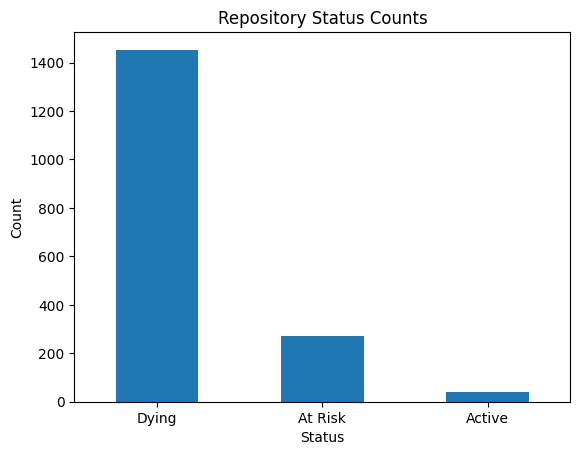

In [67]:
import matplotlib.pyplot as plt
# Plot bar graph of statuses
status_counts = repo['status'].value_counts()
status_counts.plot(kind='bar')

# Set titles and labels
plt.title('Repository Status Counts')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate labels to show horizontally

# Show plot
plt.show()

In [68]:
# Filter the DataFrame to show only active repositories
active_repos = repo[repo['status'] == "Active"]

# Display the list of active repositories
active_repos[['owner', 'repo']]

,owner,repo
1,facebook,react
4,EbookFoundation,free-programming-books
7,sindresorhus,awesome
8,vuejs,vue
9,angular,angular.js
10,robbyrussell,oh-my-zsh
14,jwasham,coding-interview-university
20,laravel,laravel
28,jekyll,jekyll
40,lodash,lodash


In [ ]:
# Filter the DataFrame to show only active repositories
active_repos = repo[repo['status'] == "Active"]

# Display the list of active repositories
active_repos[['owner', 'repo']]

,owner,repo
1,facebook,react
4,EbookFoundation,free-programming-books
7,sindresorhus,awesome
8,vuejs,vue
9,angular,angular.js
10,robbyrussell,oh-my-zsh
14,jwasham,coding-interview-university
20,laravel,laravel
28,jekyll,jekyll
40,lodash,lodash


In [ ]:
# Filter the DataFrame to show only active repositories
active_repos = repo[repo['status'] == "Active"]

# Display the list of active repositories
active_repos[['owner', 'repo']]

,owner,repo
1,facebook,react
4,EbookFoundation,free-programming-books
7,sindresorhus,awesome
8,vuejs,vue
9,angular,angular.js
10,robbyrussell,oh-my-zsh
14,jwasham,coding-interview-university
20,laravel,laravel
28,jekyll,jekyll
40,lodash,lodash


In [69]:
repo.head()

,owner,repo,stars,dateCreated,datePushed,numCommits,openIssues,closedIssues,totalIssues,totalAdditions,totalDeletions,fileCount,issue_ratio,normalized_stars,commit_activity,days_since_last_push,recency_score,issue_resolution_ratio,health_score,status
0,Alexander-MacDonald,test-repo,0,2023-10-02 20:25:12,2023-11-07 19:48:57,9,2,2,4,38.0,2.0,100005,0.666667,0.000000,0.000558,90,0.010989,0.500000,0.100168,Dying
1,facebook,react,216019,2013-05-24 16:15:54,2023-12-08 00:51:20,16117,1557,25219,26776,2734078.0,1632422.0,2592,0.061737,0.709849,1.000000,60,0.016393,0.941851,0.701325,Active
2,pallets,flask,65156,2010-04-06 11:11:59,2023-12-07 03:48:51,5205,3,5081,5084,229166.0,162846.0,250,0.000590,0.214106,0.322951,61,0.016129,0.999410,0.360999,At Risk
3,google,guetzli,12840,2016-10-21 15:13:18,2023-04-22 19:41:10,145,121,153,274,30443.0,8464.0,86,0.785714,0.042193,0.008997,289,0.003448,0.558394,0.127036,Dying
4,EbookFoundation,free-programming-books,304317,2013-10-11 06:50:37,2023-12-05 18:16:56,9110,43,10783,10826,87660.0,45151.0,215,0.003987,1.000000,0.565242,62,0.015873,0.996028,0.668778,Active


In [70]:
repo = repo.dropna()

In [71]:
repo.isnull().sum()

owner                     0
repo                      0
stars                     0
dateCreated               0
datePushed                0
numCommits                0
openIssues                0
closedIssues              0
totalIssues               0
totalAdditions            0
totalDeletions            0
fileCount                 0
issue_ratio               0
normalized_stars          0
commit_activity           0
days_since_last_push      0
recency_score             0
issue_resolution_ratio    0
health_score              0
status                    0
dtype: int64

In [72]:
repo.to_csv('Data/ml_data/graph_data_pb_main.csv', index=False)

In [31]:
# Sort the data by date to ensure correct calculations
repo.sort_values(by='date', inplace=True)

KeyError: 'date'

In [10]:
import numpy as np

# Convert the 'date' column to datetime
repo['date'] = pd.to_datetime(repo['date'])

# Sort the data by date to ensure correct calculations
repo.sort_values(by='date', inplace=True)

# Calculate commit frequency per month
repo['month'] = repo['date'].dt.to_period('M')
monthly_commits = repo.groupby('month').size().rename('monthly_commits')

# Calculate the number of unique authors per month
monthly_unique_authors = repo.groupby('month')['author'].nunique().rename('monthly_unique_authors')

# Calculate total additions and deletions per month
monthly_additions = repo.groupby('month')['totalAdditions'].sum().rename('monthly_additions')
monthly_deletions = repo.groupby('month')['totalDeletions'].sum().rename('monthly_deletions')

# Calculate code churn
repo['code_churn'] = repo['totalAdditions'] + repo['totalDeletions']

# Join all the calculated features into the original dataframe
repo = repo.set_index('month').join([monthly_commits, monthly_unique_authors, monthly_additions, monthly_deletions])

# Reset index to flatten the dataframe
repo.reset_index(inplace=True)

# Calculate the average time between commits
repo['time_between_commits'] = repo['date'].diff().dt.total_seconds().div(3600).fillna(0)

# Save the enriched dataframe to a new CSV file
repo.to_csv('datapath_to_your_enriched_csv_file', index=False)


C:\Users\ethan\AppData\Local\Temp\ipykernel_25780\511202523.py:10: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  repo['month'] = repo['date'].dt.to_period('M')


In [11]:
repo.head()

,month,url,repo,author,date,totalAdditions,totalDeletions,net_code_change,message,numFiles,numComments,fileTuple,code_churn,monthly_commits,monthly_unique_authors,monthly_additions,monthly_deletions,time_between_commits
0,2016-03,https://api.github.com/repos/alibaba/weex/comm...,weex,lvscar,2016-03-11 10:18:12+00:00,203,0,203,Initial commit,2,0,"[('LICENSE', 'added', 201, 0, 201, 'https://gi...",203,1,1,203,0,0.000000
1,2016-04,https://api.github.com/repos/alibaba/weex/comm...,weex,luics,2016-04-12 15:21:18+00:00,617,8351,-7734,+ [all] init,1046,0,"[('CONTRIBUTING.md', 'modified', 0, 0, 0, 'htt...",8968,364,15,434399,88352,773.051667
2,2016-04,https://api.github.com/repos/alibaba/weex/comm...,weex,luics,2016-04-12 15:21:18+00:00,142902,5,142897,+ [all] init,1054,1,"[('.gitignore', 'added', 23, 0, 23, 'https://g...",142907,364,15,434399,88352,0.000000
3,2016-04,https://api.github.com/repos/alibaba/weex/comm...,weex,luics,2016-04-12 15:22:31+00:00,30,6,24,+ [doc] contributing doc,2,0,"[('CONTRIBUTING.md', 'added', 28, 0, 28, 'http...",36,364,15,434399,88352,0.020278
4,2016-04,https://api.github.com/repos/alibaba/weex/comm...,weex,luics,2016-04-12 16:00:06+00:00,32,16,16,* [doc] commit & branch format,2,0,"[('CONTRIBUTING.md', 'modified', 31, 11, 42, '...",48,364,15,434399,88352,0.626389


In [6]:
repo.nunique()

url                                                                                   12044
sha                                                                                   12044
owner                                                                                     1
repo                                                                                      1
author                                                                                  195
date                                                                                  11732
totalAdditions                                                                         1314
totalDeletions                                                                          951
message                                                                               10201
numFiles                                                                                380
numComments                                                                     

#### Code freq

In [28]:
repo.head()

,url,repo,author,date,totalAdditions,totalDeletions,net_code_change,message,numFiles,numComments,fileTuple
11328,https://api.github.com/repos/google/WebFundame...,WebFundamentals,PaulKinlan,2014-03-06T15:42:44Z,314,0,314,First commit of new site,8,0,"[('.gitignore', 'added', 1, 0, 1, 'https://git..."
11327,https://api.github.com/repos/google/WebFundame...,WebFundamentals,PaulKinlan,2014-03-21T14:32:16Z,15281,313,14968,Adding a port of dartlang infrastrcuture,110,0,"[('_config.yml', 'removed', 0, 3, 3, 'https://..."
11326,https://api.github.com/repos/google/WebFundame...,WebFundamentals,PaulKinlan,2014-03-21T14:41:44Z,32,10,22,Adding a make file,3,0,"[('.gitignore', 'modified', 1, 1, 2, 'https://..."
11325,https://api.github.com/repos/google/WebFundame...,WebFundamentals,PaulKinlan,2014-03-21T15:08:54Z,97,107,-10,Adding more stuff and checking build process,9,0,"[('src/site/_includes/author.html', 'removed',..."
11324,https://api.github.com/repos/google/WebFundame...,WebFundamentals,PaulKinlan,2014-03-21T19:08:06Z,208,88,120,Adding articles as samples. Updating the arti...,15,0,"[('src/site/_plugins/articles_tag.rb', 'modifi..."


In [29]:
commit_data = repo

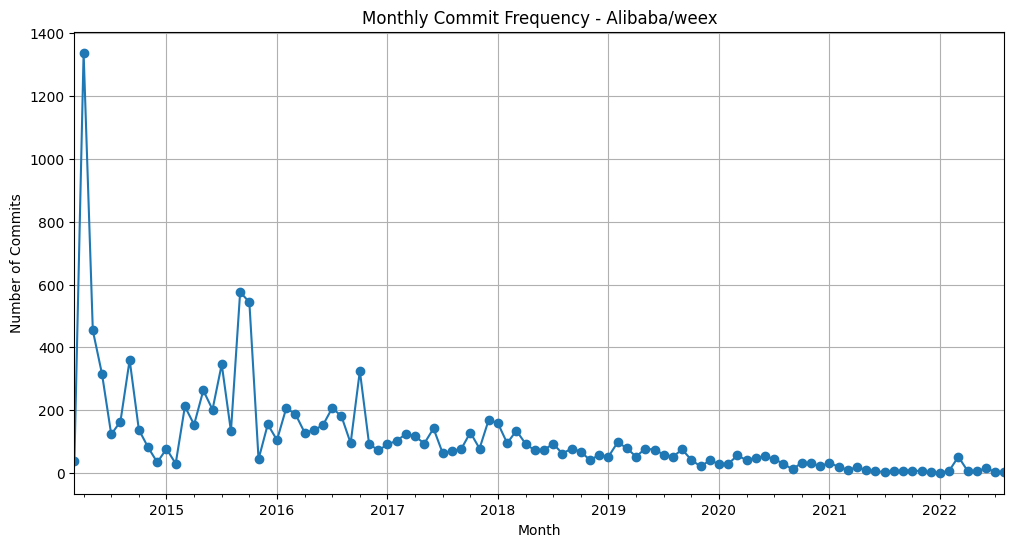

date
2022-04-30 00:00:00+00:00     7
2022-05-31 00:00:00+00:00     5
2022-06-30 00:00:00+00:00    16
2022-07-31 00:00:00+00:00     3
2022-08-31 00:00:00+00:00     2
Freq: M, dtype: int64

In [30]:
import matplotlib.pyplot as plt

# Convert 'date' column to datetime
repo['date'] = pd.to_datetime(repo['date'])

# Resample by month and count the number of commits
monthly_commits = repo.resample('M', on='date').size()

# Plotting the data
plt.figure(figsize=(12, 6))
monthly_commits.plot(kind='line', marker='o')
plt.title('Monthly Commit Frequency - Alibaba/weex')
plt.xlabel('Month')
plt.ylabel('Number of Commits')
plt.grid(True)
plt.show()

monthly_commits.tail()


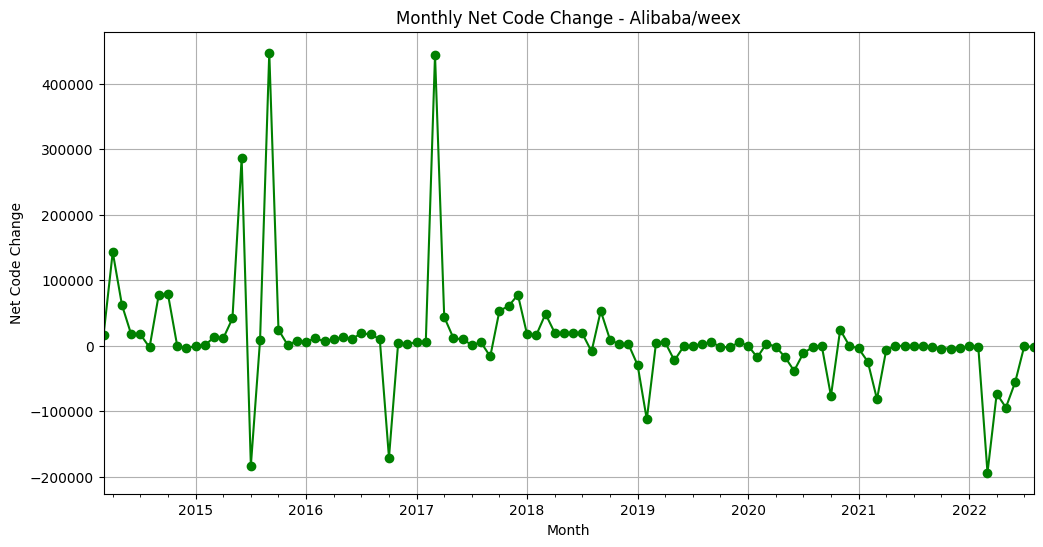

date
2022-04-30 00:00:00+00:00   -73064
2022-05-31 00:00:00+00:00   -94135
2022-06-30 00:00:00+00:00   -55769
2022-07-31 00:00:00+00:00     -192
2022-08-31 00:00:00+00:00    -2072
Freq: M, Name: net_code_change, dtype: int64

In [31]:
import matplotlib.pyplot as plt

# Resample by month and sum the total additions
monthly_additions = repo.resample('M', on='date')['net_code_change'].sum()

# Plotting the data
plt.figure(figsize=(12, 6))
monthly_additions.plot(kind='line', marker='o', color='green')
plt.title('Monthly Net Code Change - Alibaba/weex')
plt.xlabel('Month')
plt.ylabel('Net Code Change')
plt.grid(True)
plt.show()

monthly_additions.tail()


##### author contribution

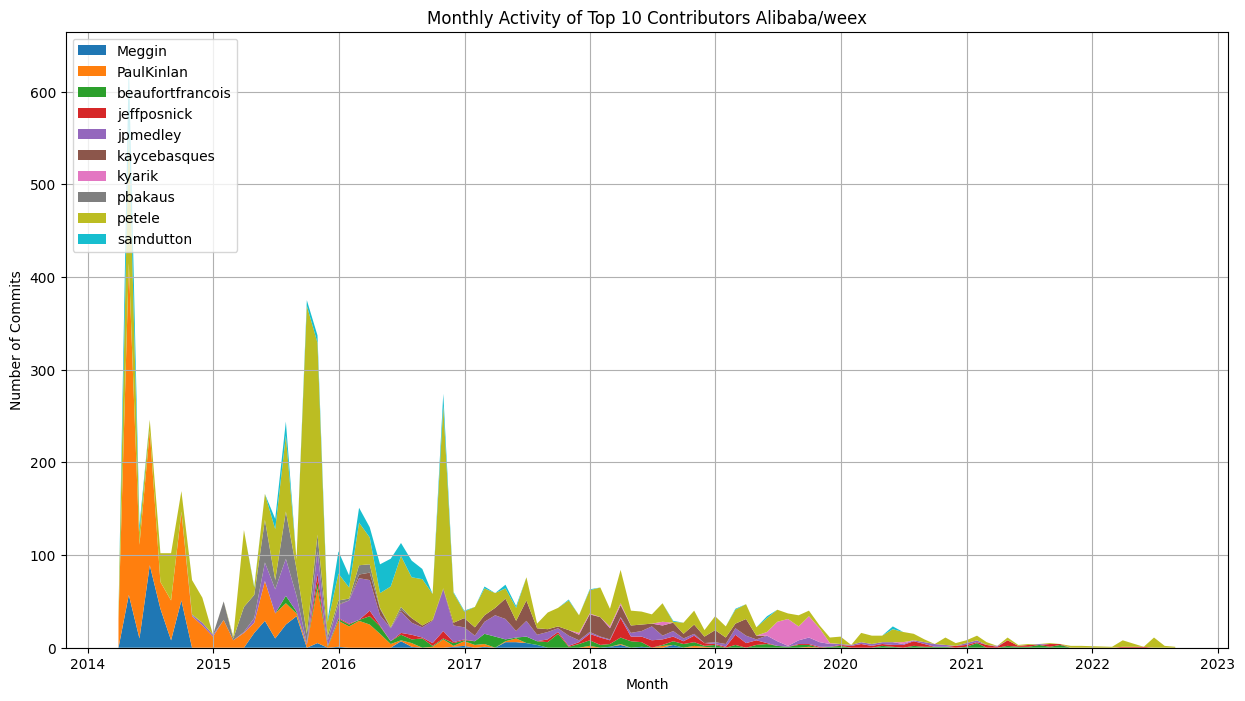

author,Meggin,PaulKinlan,beaufortfrancois,jeffposnick,jpmedley,kaycebasques,kyarik,pbakaus,petele,samdutton
date,,,,,,,,,,
2022-03-31 00:00:00+00:00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,0.0
2022-05-31 00:00:00+00:00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-06-30 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0
2022-07-31 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
2022-08-31 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [32]:
import matplotlib.pyplot as plt

# Identifying the top ten authors by total number of commits
top_authors = repo['author'].value_counts().nlargest(10).index

# Filtering the data to include only commits from these top authors
top_authors_data = repo[repo['author'].isin(top_authors)]

# Grouping data by author and resampling by month
top_authors_monthly_commits = top_authors_data.groupby(['author', pd.Grouper(freq='M', key='date')]).size().reset_index(name='num_commits')

# Pivoting the table for visualization
top_pivot_table = top_authors_monthly_commits.pivot(index='date', columns='author', values='num_commits').fillna(0)

# Plotting the data
plt.figure(figsize=(15, 8))
plt.stackplot(top_pivot_table.index, top_pivot_table.values.T, labels=top_pivot_table.columns)
plt.title('Monthly Activity of Top 10 Contributors Alibaba/weex')
plt.xlabel('Month')
plt.ylabel('Number of Commits')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

top_pivot_table.tail()


#### commit Time difference 

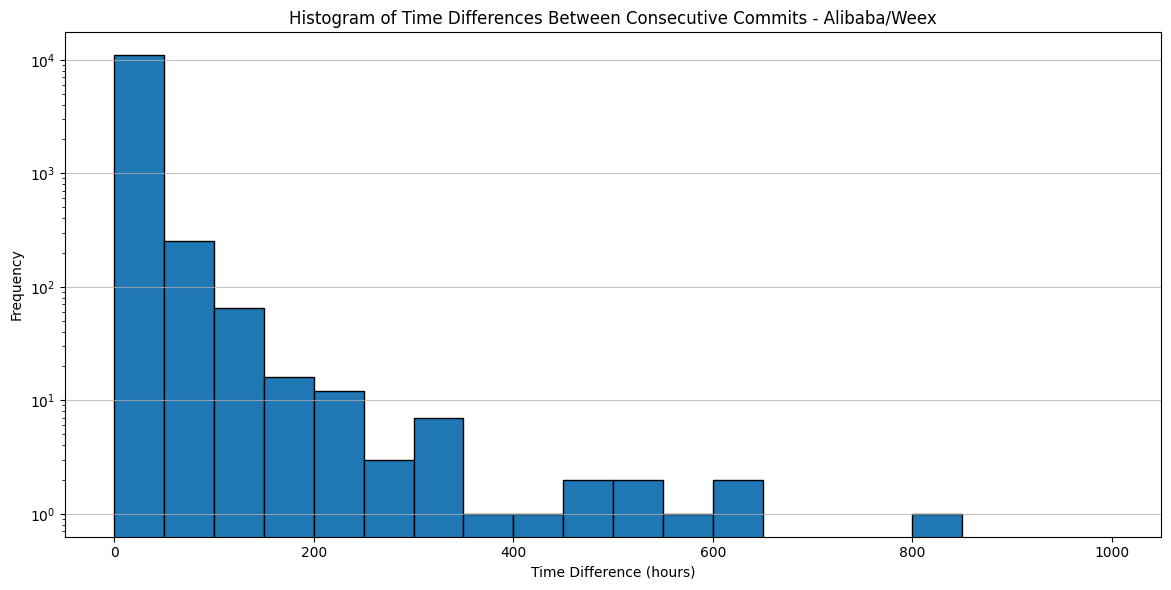

In [33]:
repo['time_diff'] = repo['date'].diff()
repo['time_diff'] = repo['time_diff'].fillna(pd.to_timedelta(0))
repo['time_diff_hours'] = repo['time_diff'].dt.total_seconds() / 3600

# Plotting histogram
plt.figure(figsize=(12, 6))
plt.hist(repo['time_diff_hours'], bins=20, edgecolor='black', range=(0, 1000))  
plt.title('Histogram of Time Differences Between Consecutive Commits - Alibaba/Weex')
plt.xlabel('Time Difference (hours)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()

plt.yscale('log')

plt.show()

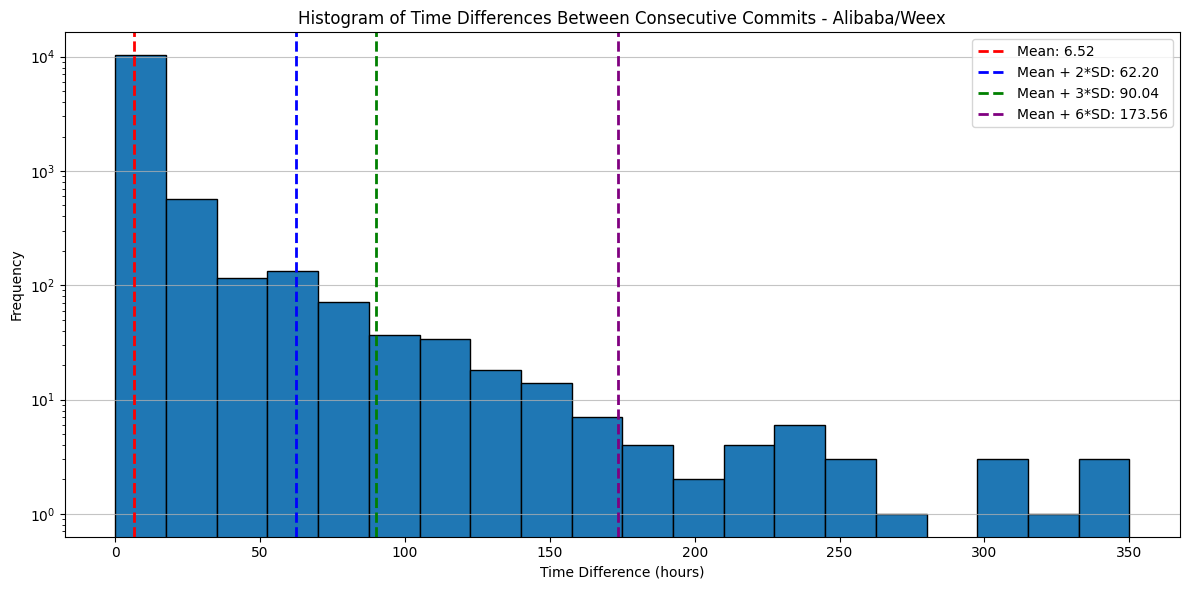

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'repo' is your DataFrame with commit information
repo['time_diff'] = repo['date'].diff()
repo['time_diff'] = repo['time_diff'].fillna(pd.to_timedelta(0))
repo['time_diff_hours'] = repo['time_diff'].dt.total_seconds() / 3600

# Plotting histogram
plt.figure(figsize=(12, 6))
plt.hist(repo['time_diff_hours'], bins=20, edgecolor='black', range=(0, 350))  
plt.title('Histogram of Time Differences Between Consecutive Commits - Alibaba/Weex')
plt.xlabel('Time Difference (hours)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Log-scale y-axis
plt.yscale('log')

# Add mean line
mean_value = repo['time_diff_hours'].mean()
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')

# Add second standard deviation (SD) line
std_value = repo['time_diff_hours'].std()
second_sd_line = mean_value + 2 * std_value
plt.axvline(second_sd_line, color='blue', linestyle='dashed', linewidth=2, label=f'Mean + 2*SD: {second_sd_line:.2f}')

# Add third standard deviation (SD) line
second_sd_line = mean_value + 3 * std_value
plt.axvline(second_sd_line, color='green', linestyle='dashed', linewidth=2, label=f'Mean + 3*SD: {second_sd_line:.2f}')


# Add third standard deviation (SD) line
second_sd_line = mean_value + 6 * std_value
plt.axvline(second_sd_line, color='purple', linestyle='dashed', linewidth=2, label=f'Mean + 6*SD: {second_sd_line:.2f}')

plt.legend()  # Show legend

plt.tight_layout()
plt.show()


In [47]:
repo

,url,repo,author,totalAdditions,totalDeletions,net_code_change,message,numFiles,numComments,fileTuple,time_diff,time_diff_hours,code_churn
date,,,,,,,,,,,,,
2016-03-11 10:18:12+00:00,https://api.github.com/repos/alibaba/weex/comm...,weex,lvscar,203,0,203,Initial commit,2,0,"[(LICENSE, added, 201, 0, 201, https://github....",NaT,0.000000,203
2016-04-12 15:21:18+00:00,https://api.github.com/repos/alibaba/weex/comm...,weex,luics,617,8351,-7734,+ [all] init,1046,0,"[(CONTRIBUTING.md, modified, 0, 0, 0, https://...",32 days 05:03:06,773.051667,8968
2016-04-12 15:21:18+00:00,https://api.github.com/repos/alibaba/weex/comm...,weex,luics,142902,5,142897,+ [all] init,1054,1,"[(.gitignore, added, 23, 0, 23, https://github...",0 days 00:00:00,0.000000,142907
2016-04-12 15:22:31+00:00,https://api.github.com/repos/alibaba/weex/comm...,weex,luics,30,6,24,+ [doc] contributing doc,2,0,"[(CONTRIBUTING.md, added, 28, 0, 28, https://g...",0 days 00:01:13,0.020278,36
2016-04-12 16:00:06+00:00,https://api.github.com/repos/alibaba/weex/comm...,weex,luics,32,16,16,* [doc] commit & branch format,2,0,"[(CONTRIBUTING.md, modified, 31, 11, 42, https...",0 days 00:37:35,0.626389,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-07 13:19:18+00:00,https://api.github.com/repos/alibaba/weex/comm...,weex,katherine95s,2,1,1,fix:修复OnReceivedResult CallbackId (#3313) * [...,1,0,[(weex_core/Source/android/bridge/script_bridg...,63 days 06:04:41,1518.078056,3
2022-09-28 03:42:59+00:00,https://api.github.com/repos/alibaba/weex/comm...,weex,yuditxj,8,0,8,[ios]fix maxlength issues (#3312),1,0,[(ios/sdk/WeexSDK/Sources/Component/WXEditComp...,20 days 14:23:41,494.394722,8
2022-09-28 03:44:41+00:00,https://api.github.com/repos/alibaba/weex/comm...,weex,yuditxj,2,0,2,[ios]fix date|time reset issues (#3311),1,0,[(ios/sdk/WeexSDK/Sources/Component/WXEditComp...,0 days 00:01:42,0.028333,2


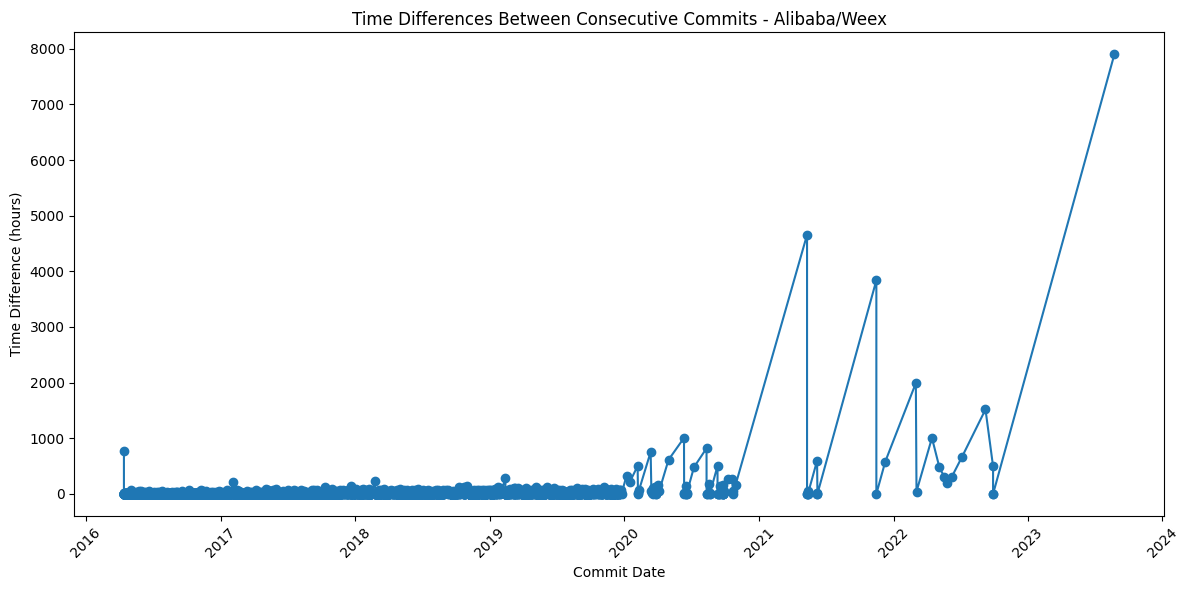

In [17]:
import pandas as pd
import matplotlib.pyplot as plt



# Calculate time differences between consecutive commits
repo['time_diff'] = repo['date'].diff()

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'commit_date': repo['date'],
    'time_diff': repo['time_diff']
})

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(plot_data['commit_date'], plot_data['time_diff'].dt.total_seconds() / 3600, marker='o', linestyle='-')
plt.title('Time Differences Between Consecutive Commits - Alibaba/Weex')
plt.xlabel('Commit Date')
plt.ylabel('Time Difference (hours)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\ethan\AppData\Local\Temp\ipykernel_32512\1343960593.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_repo['time_diff'] = filtered_repo['date'].diff()


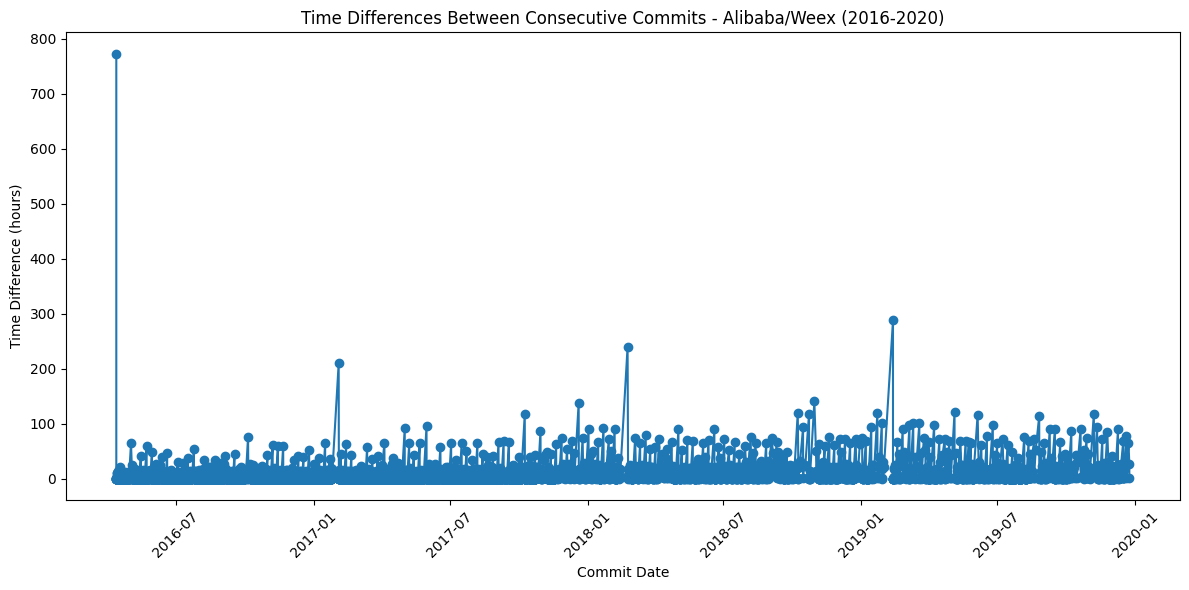

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming repo is your DataFrame

# Filter commits between 2016 and 2020
filtered_repo = repo[(repo['date'] >= '2016-01-01') & (repo['date'] <= '2020-01-1')]

# Calculate time differences between consecutive commits
filtered_repo['time_diff'] = filtered_repo['date'].diff()

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'commit_date': filtered_repo['date'],
    'time_diff': filtered_repo['time_diff']
})

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(plot_data['commit_date'], plot_data['time_diff'].dt.total_seconds() / 3600, marker='o', linestyle='-')
plt.title('Time Differences Between Consecutive Commits - Alibaba/Weex (2016-2020)')
plt.xlabel('Commit Date')
plt.ylabel('Time Difference (hours)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Code latency 

In [19]:

# Calculate statistics for code review latency
average_latency = repo['time_diff_hours'].mean()
median_latency = repo['time_diff_hours'].median()
max_latency = repo['time_diff_hours'].max()

print(f"Average Code  Latency: {average_latency:.2f} hours")
print(f"Median Code  Latency: {median_latency:.2f} hours")
print(f"Maximum Code  Latency: {max_latency:.2f} hours")

Average Code  Latency: 5.42 hours
Median Code  Latency: 0.24 hours
Maximum Code  Latency: 7900.86 hours


#### Code Churn

In [33]:
repo['code_churn'] = repo['totalAdditions'] + repo['totalDeletions']


# Set the date column as the index
repo.set_index('date', inplace=True)

# Resample and sum churn over your chosen time interval, e.g., weekly
weekly_churn = repo['code_churn'].resample('W').sum()


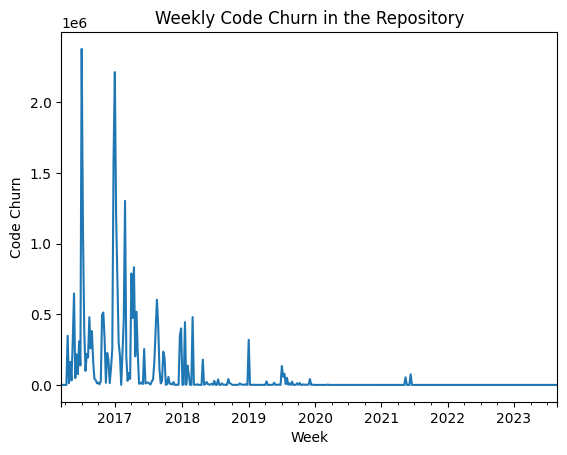

In [34]:
import matplotlib.pyplot as plt

weekly_churn.plot()
plt.title('Weekly Code Churn in the Repository')
plt.xlabel('Week')
plt.ylabel('Code Churn')
plt.show()


In [35]:
# Weekly Churn
weekly_churn = repo['code_churn'].resample('W').sum()

# Monthly Churn
monthly_churn = repo['code_churn'].resample('M').sum()

# Quarterly Churn
quarterly_churn = repo['code_churn'].resample('Q').sum()


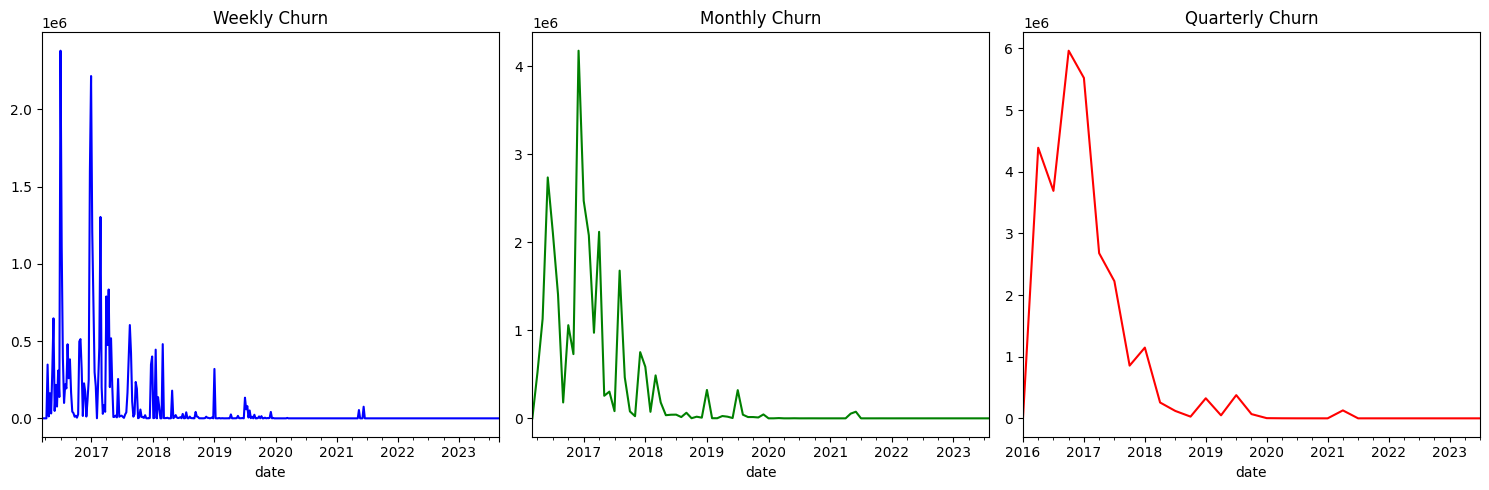

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

# Plotting Weekly Churn
plt.subplot(1, 3, 1)
weekly_churn.plot(title='Weekly Churn', color='blue')

# Plotting Monthly Churn
plt.subplot(1, 3, 2)
monthly_churn.plot(title='Monthly Churn', color='green')

# Plotting Quarterly Churn
plt.subplot(1, 3, 3)
quarterly_churn.plot(title='Quarterly Churn', color='red')

plt.tight_layout()
plt.show()


#### unique contributors 

In [45]:
# Count unique contributors per time period (e.g., per month)
monthly_contributors = repo.groupby(repo.index.to_period('M')).nunique()['author']

# Plotting the number of unique contributors per month
monthly_contributors.plot(kind='bar', figsize=(10, 5))
plt.title('Unique Contributors per Month')
plt.xlabel('Month')
plt.ylabel('Number of Unique Contributors')

# This ensures that the x-axis labels are dates and not too crowded.
plt.xticks(rotation=45)

plt.tight_layout() # This will help to fit the plot within the figure area properly.
plt.show()

C:\Users\ethan\AppData\Local\Temp\ipykernel_32512\3466810064.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_contributors = repo.groupby(repo.index.to_period('M')).nunique()['author']


TypeError: unhashable type: 'list'

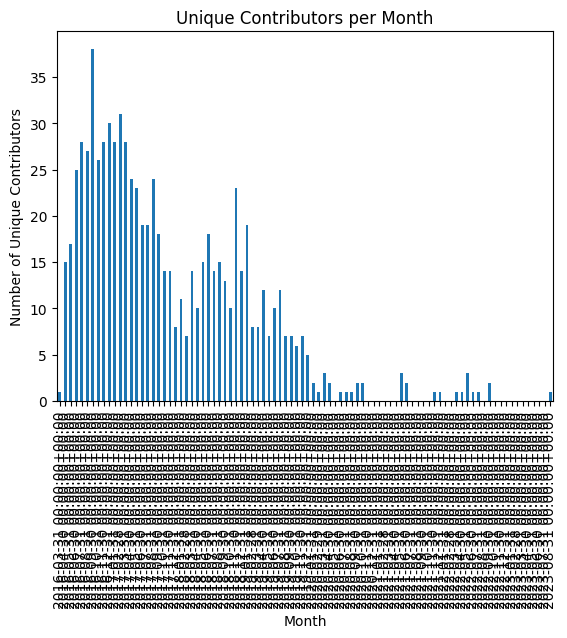

In [42]:
# Set the date as the index
#repo.set_index('date', inplace=True)

# Count unique contributors monthly
monthly_contributors = repo.groupby(pd.Grouper(freq='M'))['author'].nunique()

import matplotlib.pyplot as plt

monthly_contributors.plot(kind='bar')
plt.title('Unique Contributors per Month')
plt.xlabel('Month')
plt.ylabel('Number of Unique Contributors')
plt.show()


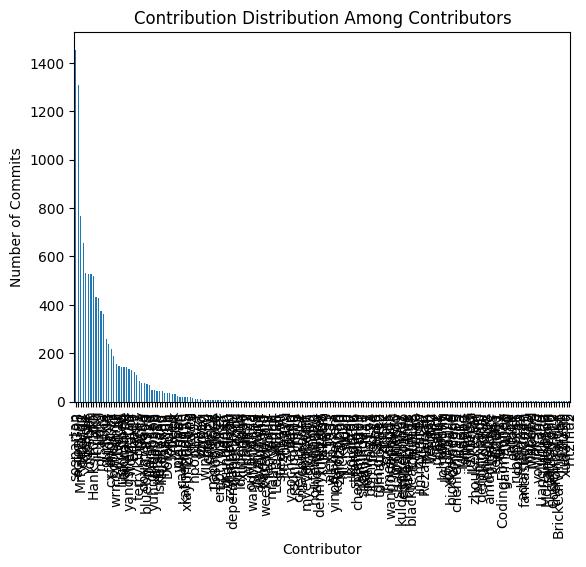

In [43]:
commit_counts = repo['author'].value_counts()
commit_counts.plot(kind='bar')
plt.title('Contribution Distribution Among Contributors')
plt.xlabel('Contributor')
plt.ylabel('Number of Commits')
plt.show()


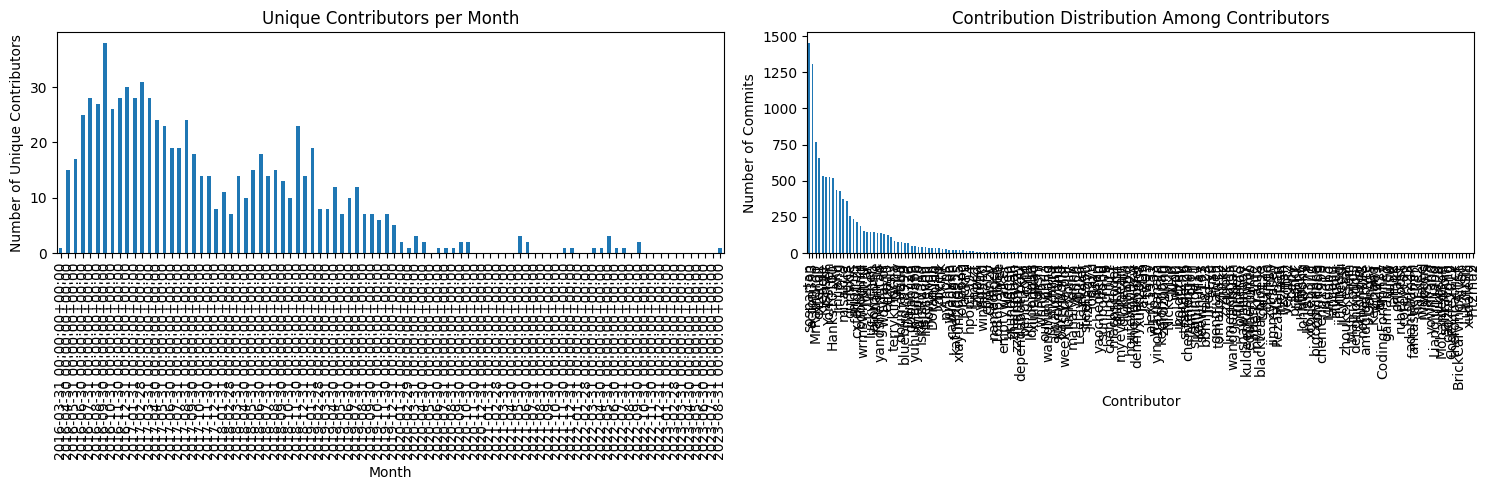

In [44]:
plt.figure(figsize=(15, 5))

# Plotting unique contributors over time
plt.subplot(1, 2, 1)
monthly_contributors.plot(kind='bar')
plt.title('Unique Contributors per Month')
plt.xlabel('Month')
plt.ylabel('Number of Unique Contributors')

# Plotting contribution distribution
plt.subplot(1, 2, 2)
commit_counts.plot(kind='bar')
plt.title('Contribution Distribution Among Contributors')
plt.xlabel('Contributor')
plt.ylabel('Number of Commits')

plt.tight_layout()
plt.show()


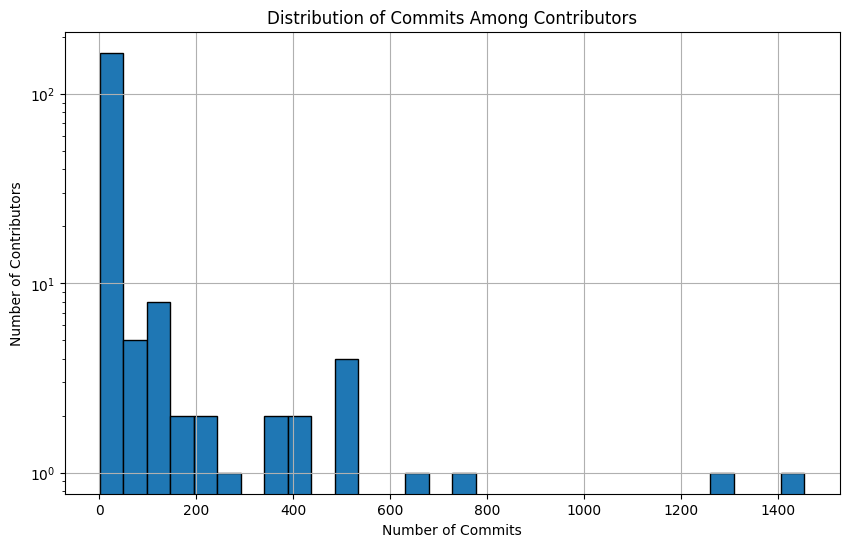

In [39]:
# Set the date as the index
repo.set_index('date', inplace=True)

# Count unique contributors monthly
monthly_contributors = repo.groupby(pd.Grouper(freq='M'))['author'].nunique()

#### time series

In [59]:
import pandas as pd



# Resample the data to a regular time interval (e.g., daily)
# Use the count of commits per day as the value to forecast
daily_commits = repo.resample('D').size()


In [60]:
from statsmodels.tsa.stattools import adfuller

# Augmented Dickey-Fuller test
result = adfuller(daily_commits.dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -2.5538253163260896
p-value: 0.10292101766679645


In [88]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Fit the ARIMA model
# Experiment with different parameters (p, d, q) as needed
model = ARIMA(daily_commits, order=(2, 2, 1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2722
Model:                 ARIMA(2, 2, 1)   Log Likelihood               -9384.339
Date:                Tue, 23 Jan 2024   AIC                          18776.678
Time:                        14:50:50   BIC                          18800.312
Sample:                    03-11-2016   HQIC                         18785.222
                         - 08-23-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1437      0.010    -15.051      0.000      -0.162      -0.125
ar.L2         -0.2614      0.009    -29.422      0.000      -0.279      -0.244
ma.L1         -1.0000      0.658     -1.519      0.1

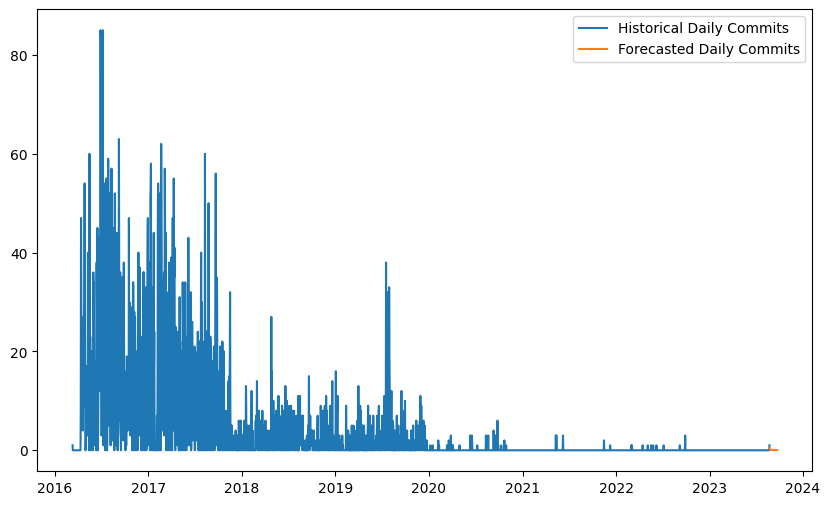

In [75]:
# Forecast the next 30 days
forecast = model_fit.forecast(steps=30)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(daily_commits, label='Historical Daily Commits')
plt.plot(forecast, label='Forecasted Daily Commits')
plt.legend()
plt.show()


In [76]:
forecast

2023-08-24 00:00:00+00:00    0.459818
2023-08-25 00:00:00+00:00    0.229814
2023-08-26 00:00:00+00:00    0.131881
2023-08-27 00:00:00+00:00    0.090182
2023-08-28 00:00:00+00:00    0.072426
2023-08-29 00:00:00+00:00    0.064867
2023-08-30 00:00:00+00:00    0.061648
2023-08-31 00:00:00+00:00    0.060277
2023-09-01 00:00:00+00:00    0.059693
2023-09-02 00:00:00+00:00    0.059445
2023-09-03 00:00:00+00:00    0.059339
2023-09-04 00:00:00+00:00    0.059294
2023-09-05 00:00:00+00:00    0.059275
2023-09-06 00:00:00+00:00    0.059267
2023-09-07 00:00:00+00:00    0.059263
2023-09-08 00:00:00+00:00    0.059262
2023-09-09 00:00:00+00:00    0.059261
2023-09-10 00:00:00+00:00    0.059261
2023-09-11 00:00:00+00:00    0.059261
2023-09-12 00:00:00+00:00    0.059261
2023-09-13 00:00:00+00:00    0.059261
2023-09-14 00:00:00+00:00    0.059261
2023-09-15 00:00:00+00:00    0.059261
2023-09-16 00:00:00+00:00    0.059261
2023-09-17 00:00:00+00:00    0.059261
2023-09-18 00:00:00+00:00    0.059261
2023-09-19 0

#### FileTuple

In [20]:
import pandas as pd

# Convert the 'fileTuple' column from a list to a string
repo['fileTuple'] = repo['fileTuple'].apply(str)

# Parse the 'fileTuple' column to extract file information using ast.literal_eval
import ast
repo['fileTuple'] = repo['fileTuple'].apply(ast.literal_eval)

# Create a new DataFrame to store file-level information
file_df = pd.DataFrame()

# Iterate through each row of the original DataFrame
for index, row in repo.iterrows():
    commit_files = row['fileTuple']
    for file_info in commit_files:
        file_dict = {
            'url': row['url'],
            'file_name': file_info[0],
            'status': file_info[1],
            'additions': file_info[2],
            'deletions': file_info[3],
            'changes': file_info[4],
            'raw_url': file_info[5],
            'contents_url': file_info[6]
        }
        # Use concat to append rows to the DataFrame
        file_df = pd.concat([file_df, pd.DataFrame([file_dict])], ignore_index=True)

# Group the file DataFrame by 'file_name' and sum the changes
file_changes = file_df.groupby('file_name')['changes'].sum()

# Sort the files based on the total changes in descending order
sorted_files = file_changes.sort_values(ascending=False)

# Display the files with the most commit changes
print(sorted_files.head())


KeyboardInterrupt: 

In [ ]:
file_changes

file_name
.DS_Store                                                   0
.babelrc                                                    0
.eslintignore                                             183
.eslintrc                                                2111
.flowconfig                                               328
                                                        ...  
weex_core/test/third_party/googletest/library.json         59
weex_core/test/third_party/googletest/platformio.ini       31
weex_core/tools/cpp-style-check.sh                        174
weex_core/tools/cpplint.py                              12410
weex_core/trace.sh                                          2
Name: changes, Length: 10429, dtype: int64

In [ ]:
sorted_files

file_name
package-lock.json                                                                                           15238
packages/weex-legacy-framework/index.js                                                                     11554
playground/package-lock.json                                                                                 5032
test/js-framework/unit/default/vm/vm.js                                                                      3950
playground/ios/bundlejs/about.weex.js                                                                        3309
                                                                                                            ...  
playground/android/playground/src/androidTest/java/org/apache/weex/uitest/uitest/TC_Animation/.gitignore        0
playground/ios/WeexDemo.xcworkspace/xcuserdata/jianhan.xcuserdatad/UserInterfaceState.xcuserstate               0
playground/ios/WeexDemo.xcworkspace/xcuserdata/wangrenmin.xcuserdatad/UserInte

In [26]:
# Assuming file_df is the DataFrame with file-level information
# Merge file_df with the original repo DataFrame on 'url' to get commit date
merged_df = pd.merge(file_df, repo[['url', 'date']], on='url')

# Display the resulting DataFrame with file name, net code change, and commit date
result_df = merged_df[['file_name', 'changes', 'date']]

# Sort the resulting DataFrame by the 'changes' column in descending order
result_df = result_df.sort_values(by='changes', ascending=False)

result_df

,file_name,changes,date
2094,website/js/vendor/jquery.js,9210,2016-04-12 15:21:18+00:00
498,android/sdk/assets/main.js,7806,2016-04-12 15:21:18+00:00
4607,android/sdk/assets/main.js,7806,2016-04-26 06:04:51+00:00
2895,android/sdk/assets/main.js,7798,2016-04-14 02:42:37+00:00
2867,android/sdk/assets/main.js,7798,2016-04-13 16:41:46+00:00
...,...,...,...
280,android/playground/app/src/main/java_zxing/com...,0,2016-04-12 15:21:18+00:00
279,android/playground/app/src/main/java_zxing/com...,0,2016-04-12 15:21:18+00:00
278,android/playground/app/src/main/java_zxing/com...,0,2016-04-12 15:21:18+00:00
277,android/playground/app/src/main/java_zxing/com...,0,2016-04-12 15:21:18+00:00


In [27]:
# Assuming your DataFrame is named sorted_result_df
file_occurrences = sorted_result_df[sorted_result_df['file_name'] == 'packages/weex-legacy-framework/index.js']

# Display all occurrences
print(file_occurrences)


NameError: name 'sorted_result_df' is not defined

### Numerical df

In [ ]:
repo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12044 entries, 2023-08-23 10:57:34+00:00 to 2016-03-11 10:18:12+00:00
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   url              12044 non-null  object
 1   repo             12044 non-null  object
 2   author           11256 non-null  object
 3   totalAdditions   12044 non-null  int64 
 4   totalDeletions   12044 non-null  int64 
 5   net_code_change  12044 non-null  int64 
 6   message          12044 non-null  object
 7   numFiles         12044 non-null  int64 
 8   numComments      12044 non-null  int64 
 9   fileTuple        12044 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.0+ MB


In [ ]:
num_df = repo
# Creating a new DataFrame with only numerical features
num_df = ['author','totalAdditions', 'totalDeletions', 'numFiles', 'numComments']

# Selecting only the numerical features from the original dataset
num_df = repo[num_df]


In [28]:
repo.head(3)

,url,repo,author,date,totalAdditions,totalDeletions,net_code_change,message,numFiles,numComments,fileTuple,time_diff,time_diff_hours
12043,https://api.github.com/repos/alibaba/weex/comm...,weex,lvscar,2016-03-11 10:18:12+00:00,203,0,203,Initial commit,2,0,"[(LICENSE, added, 201, 0, 201, https://github....",NaT,0.000000
11892,https://api.github.com/repos/alibaba/weex/comm...,weex,luics,2016-04-12 15:21:18+00:00,617,8351,-7734,+ [all] init,1046,0,"[(CONTRIBUTING.md, modified, 0, 0, 0, https://...",32 days 05:03:06,773.051667
12042,https://api.github.com/repos/alibaba/weex/comm...,weex,luics,2016-04-12 15:21:18+00:00,142902,5,142897,+ [all] init,1054,1,"[(.gitignore, added, 23, 0, 23, https://github...",0 days 00:00:00,0.000000


#### OneHotEncoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
# Initialize OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)

# Reshape the 'artists' column
artists_column = num_df['author'].values.reshape(-1, 1)

# Fit and transform the one-hot encoding on the 'artists' column
one_hot_encoded_artists = one_hot_encoder.fit_transform(artists_column)

num_df['author'] = np.argmax(one_hot_encoded_artists, axis=1)
num_df['net_code_change'] = num_df['totalAdditions'] - num_df['totalDeletions']


C:\Users\ethan\AppData\Local\Temp\ipykernel_1652\1322002274.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df['author'] = np.argmax(one_hot_encoded_artists, axis=1)
C:\Users\ethan\AppData\Local\Temp\ipykernel_1652\1322002274.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df['net_code_change'] = num_df['totalAdditions'] - num_df['totalDeletions']


In [ ]:
num_df.head()

,author,totalAdditions,totalDeletions,numFiles,numComments,net_code_change
date,,,,,,
2023-08-23 10:57:34+00:00,183,2,1,1,0,1
2022-09-28 06:06:08+00:00,183,7,3,1,0,4
2022-09-28 03:44:41+00:00,183,2,0,1,0,2
2022-09-28 03:42:59+00:00,183,8,0,1,0,8
2022-09-07 13:19:18+00:00,99,2,1,1,0,1


In [ ]:
num_df.isnull().sum()

author             0
totalAdditions     0
totalDeletions     0
numFiles           0
numComments        0
net_code_change    0
dtype: int64

In [22]:
num_df.describe()

NameError: name 'num_df' is not defined

## Graph Deep Learning 

In [29]:
ali_repo = ali_repo.rename(columns={'fileTuples<fileName. status. additions. deletions. changes. raw_url. contents_url>': 'fileTuple'})
ali_repo['net_code_change'] = ali_repo['totalAdditions'] - ali_repo['totalDeletions']


In [24]:
import dgl
import torch

# Create a unique identifier for each commit
ali_repo['commit_id'] = ali_repo['sha'].astype('category').cat.codes

# Create a dictionary to map commit IDs to their row indices
commit_id_to_index = {commit_id: index for index, commit_id in enumerate(ali_repo['commit_id'])}

# Assume sequential commits in the dataset form edges (this is a simplification)
# We will create edges between consecutive commits
src = [commit_id_to_index[id] for id in ali_repo['commit_id'][:-1]]
dst = [commit_id_to_index[id] for id in ali_repo['commit_id'][1:]]

# Create the DGL Graph
g = dgl.graph((src, dst))

# Add features: totalAdditions, totalDeletions, numFiles, numComments
# For simplicity, we ignore other potential features for now
features = torch.tensor(ali_repo[['net_code_change',  'numFiles', 'numComments']].values, dtype=torch.float32)
g.ndata['features'] = features

g, features.shape


(Graph(num_nodes=12044, num_edges=12043,
       ndata_schemes={'features': Scheme(shape=(3,), dtype=torch.float32)}
       edata_schemes={}),
 torch.Size([12044, 3]))

In [31]:
pip install dgl

  Obtaining dependency information for dgl from https://files.pythonhosted.org/packages/95/cf/a08142b3e9443eb855b7f30e9f34c5ff4c0590b8efcd12895d91ea24c54f/dgl-2.0.0-cp39-cp39-win_amd64.whl.metadata
  Obtaining dependency information for torchdata>=0.5.0 from https://files.pythonhosted.org/packages/08/05/d717b62841b32c29aabfb834d7fe606fdeb0420953b0391da1cde7804577/torchdata-0.7.1-cp39-cp39-win_amd64.whl.metadata
   ---------------------------------------- 0.0/4.6 MB ? eta -:--:--
   ---- ----------------------------------- 0.5/4.6 MB 15.2 MB/s eta 0:00:01
   ----------------- ---------------------- 2.0/4.6 MB 25.1 MB/s eta 0:00:01
   ------------------------------- -------- 3.6/4.6 MB 33.2 MB/s eta 0:00:01
   ---------------------------------------  4.6/4.6 MB 32.7 MB/s eta 0:00:01
   ---------------------------------------- 4.6/4.6 MB 26.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 1.3/1.3 MB 42.6 MB


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\ethan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [32]:
import dgl
import torch
import pandas as pd
from collections import defaultdict

# Load the data
df = ali_repo[:50]


# Parse the fileTuples to get a list of files for each commit
# Here I'm assuming fileTuples is a string representation of a list and needs to be parsed.
# This will need to be adapted to the actual format of your fileTuples column.
df['fileTuples'] = df['fileTuples'].apply(eval)

# Initialize a dictionary to keep track of files and the commits that modified them
file_to_commits = defaultdict(list)

# Populate the dictionary
for index, row in df.iterrows():
    for file_tuple in row['fileTuple']:
        filename = file_tuple[0]  # Assuming the first element of the tuple is the filename
        file_to_commits[filename].append(row['commit_id'])

# Create edges based on shared files
edges_src = []
edges_dst = []

for commits in file_to_commits.values():
    for i in range(len(commits)):
        for j in range(i + 1, len(commits)):
            edges_src.append(commits[i])
            edges_dst.append(commits[j])

# Convert edges to tensor
edge_tensor_src = torch.tensor(edges_src, dtype=torch.int64)
edge_tensor_dst = torch.tensor(edges_dst, dtype=torch.int64)

# Create the DGL graph
g = dgl.graph((edge_tensor_src, edge_tensor_dst))

# Add node features
features = torch.tensor(df[['totalAdditions', 'totalDeletions', 'net_code_change']].values, dtype=torch.float32)
g.ndata['features'] = features



# Evaluate the model
# ...

# Interpret the results
# ...


DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


KeyError: 'fileTuples'

In [ ]:
g, features.shape

C:\Users\Ethan Vaz Falcao\AppData\Local\Temp\ipykernel_20152\2539844134.py:10: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  sampled_nodes = random.sample(nx_graph.nodes(), sample_size)


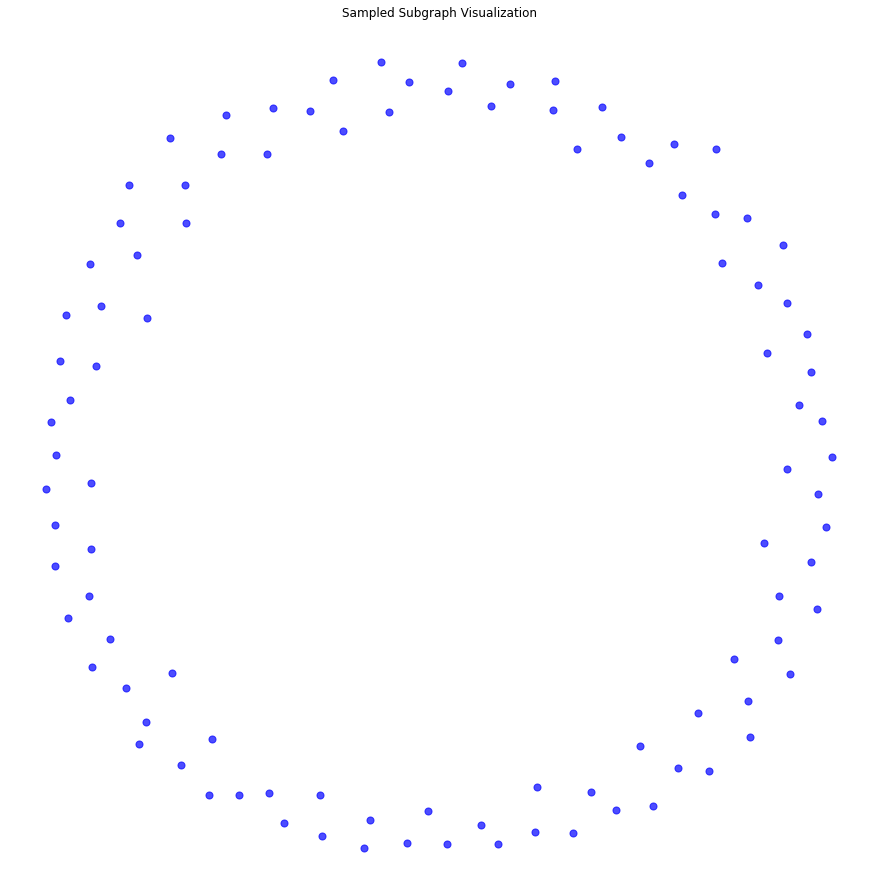

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Convert DGL graph to NetworkX for visualization
nx_graph = g.to_networkx().to_undirected()

# Since the graph is large, we'll take a random sample of nodes for visualization
sample_size = 100  # number of nodes in the sample
sampled_nodes = random.sample(nx_graph.nodes(), sample_size)
subgraph = nx_graph.subgraph(sampled_nodes)

# Visualize the subgraph
plt.figure(figsize=(12, 12))
nx.draw(subgraph, with_labels=False, node_size=50, node_color="blue", alpha=0.7, edge_color="gray")
plt.title("Sampled Subgraph Visualization")
plt.show()


In [ ]:
import dgl
import torch

# Create a graph with 3 nodes and 4 edges
u = torch.tensor([0, 0, 0, 1])  # Source nodes
v = torch.tensor([1, 2, 3, 3])  # Destination nodes
g = dgl.graph((u, v))


DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


In [ ]:
# Add node features
g.ndata['feature'] = torch.randn(3, 5)  # 3 nodes with 5 features each

# Add edge features
g.edata['weight'] = torch.randn(4, 2)  # 4 edges with 2 features each


DGLError: Expect number of features to match number of nodes (len(u)). Got 3 and 4 instead.

In [ ]:
import dgl.nn as dglnn
import torch.nn as nn
import torch.nn.functional as F

class GCN(nn.Module):
    def __init__(self, in_feats, h_feats, num_classes):
        super(GCN, self).__init__()
        self.conv1 = dglnn.GraphConv(in_feats, h_feats)
        self.conv2 = dglnn.GraphConv(h_feats, num_classes)

    def forward(self, g, in_feat):
        h = F.relu(self.conv1(g, in_feat))
        h = self.conv2(g, h)
        return h
